
#  <span style="color:orange">Analise de Dados Serviço de Telemarketing</span>

**Erik Tavares dos Anjos** <br />
**Date Updated: 05/06/2022** <br />
**GIT: https://github.com/eriktavares/compass-telemarketing**

# Cenário </br>
“Você provavelmente já recebeu uma ligação de telemarketing oferecendo um produto que você não precisa. Essa situação de estresse é minimizada quando você oferece um produto que o cliente realmente precisa.”

# Objetivo </br>
Este documento tem como objetivo analisar os dados do dataset com as informações dos clientes em potêncial e atraveis dos seus dados avaliar se eles precisam ou não de um determinado produto. Dessa forma será feito uma analise exploratória dos dados e modelagem através de algoritmos de machine learning para classificação 

# Ambiente

O ambiente utilizado é a plataforma Anaconda [https://www.anaconda.com/] e o experimento feito com jupyter notebook. No diretório backups existe o arquivo environments_user.yaml com o backup do ambiente do ananda com todas as versões das ferramentas utilizadas neste documento.

Um notebook MLFlow Run está com o código para iniciar o MLflow, após iniciado o acesso pelo endereço http://127.0.0.1:5000/. Dentro da ferramenta podem ser visto do o log dos experimentos.

# Leitura dos dados

In [215]:
import pandas as pd
df_metadata= pd.read_csv('../Data/raw/metadata.csv')
df_train= pd.read_csv('../Data/raw/train.csv')

# MLFLOW


Para realizar o gerenciamento do ciclo de vida deste projeto de machine learning, será utilizado o MLFLOW. Conforme a descrição do site "O MLflow é uma plataforma de código aberto para gerenciar o ciclo de vida do ML, incluindo experimentação, reprodutibilidade, implantação e um registro de modelo central. Atualmente, o MLflow oferece quatro componentes: " https://mlflow.org/

In [217]:
# Para usar o sqlite como repositorio
import mlflow
mlflow.set_tracking_uri("sqlite:///mlruns.db")

experiment_name = 'Telemarketing_Experiment'
experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment is None:
    experiment_id = mlflow.create_experiment(experiment_name)
    experiment = mlflow.get_experiment(experiment_id)
experiment_id = experiment.experiment_id

# Metadata

O metadata tem a descrição do tipo da variável, Quantitativa ou Qualidativa. Abaixo pode ser visto as quantidades de cada tipo
de váriavel. 


As variáveis quantitativas ou numéricas podem ser

**Discretas:** assumem apenas valores inteiros. Ex.: número de irmãos, número de passageiros <br />
**Contínuas:** assume qualquer valor no intervalo dos números reais. Ex.: peso, altura 
As variáveis qualitativas ou categóricas podem ser <br />
**Nominais:** quando as categorias não possuem uma ordem natural. Ex.: nomes, cores, sexo. <br />
**Ordinais:** quando as categorias podem ser ordenadas. Ex.: tamanho (pequeno, médio, grande), classe social (baixa, média, alta), grau de instrução (básico, médio, graduação, pós-graduação)
                                                                                                                                                  
[https://www.inf.ufsc.br/~andre.zibetti/probabilidade/aed.html]        

In [358]:
df_metadata.head()

,Variavel cod,Variavel tipo
0,id,Qualitativo nominal
1,var1,Qualitativo nominal
2,var2,Qualitativo nominal
3,var3,Qualitativo nominal
4,var4,Qualitativo nominal


Quantidade de cada tipo de váriável

In [219]:
df_metadata['Variavel tipo'].value_counts()

Qualitativo nominal      36
Quantitativo discreto    18
Quantitativo continua    12
Qualitativo ordinal       4
Name: Variavel tipo, dtype: int64

In [214]:
df_metadata_vars=df_metadata[df_metadata['Variavel cod']!='id'].copy()
df_metadata_vars=df_metadata_vars[df_metadata_vars['Variavel cod']!='y'].copy()
df_metadata_vars=df_metadata_vars.reset_index()
df_metadata_vars

,index,Variavel cod,Variavel tipo
0,1,var1,Qualitativo nominal
1,2,var2,Qualitativo nominal
2,3,var3,Qualitativo nominal
3,4,var4,Qualitativo nominal
4,5,var5,Qualitativo nominal
...,...,...,...
63,64,var64,Quantitativo continua
64,65,var65,Quantitativo continua
65,66,var66,Quantitativo continua
66,67,var67,Quantitativo discreto


Separação das variáveis qualitativas

In [139]:
df_Qualitativo_nominal = df_metadata_vars[df_metadata_vars['Variavel tipo']=='Qualitativo nominal']
df_Qualitativo_ordinal = df_metadata_vars[df_metadata_vars['Variavel tipo']=='Qualitativo ordinal']
df_Qualitativo = pd.concat([df_Qualitativo_nominal, df_Qualitativo_ordinal], axis=0)
df_Qualitativo
#df_Qualitativo_ordinal

,index,Variavel cod,Variavel tipo
0,1,var1,Qualitativo nominal
1,2,var2,Qualitativo nominal
2,3,var3,Qualitativo nominal
3,4,var4,Qualitativo nominal
4,5,var5,Qualitativo nominal
5,6,var6,Qualitativo nominal
6,7,var7,Qualitativo nominal
7,8,var8,Qualitativo nominal
8,9,var9,Qualitativo nominal
9,10,var10,Qualitativo nominal


Separação das variáveis quantitativas

In [140]:
df_Quantitativo_continua = df_metadata_vars[df_metadata_vars['Variavel tipo']=='Quantitativo continua']
df_Quantitativo_discreto = df_metadata_vars[df_metadata_vars['Variavel tipo']=='Quantitativo discreto']
df_Quantitativo = pd.concat([df_Quantitativo_continua, df_Quantitativo_discreto], axis=0)
df_Quantitativo

,index,Variavel cod,Variavel tipo
54,55,var55,Quantitativo continua
55,56,var56,Quantitativo continua
56,57,var57,Quantitativo continua
57,58,var58,Quantitativo continua
58,59,var59,Quantitativo continua
59,60,var60,Quantitativo continua
60,61,var61,Quantitativo continua
61,62,var62,Quantitativo continua
62,63,var63,Quantitativo continua
63,64,var64,Quantitativo continua


# Dataset Train

No dados contidos no arquivo train, estão os valores das variáveis e o valor da váriável alvo y, com o inderesse do cliente.

In [141]:
df_train.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,18,19,2853,29442,1386,2435,35,-999,3,63,...,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706,1
1,4,110,1986,13684,7189,-999,-999,17,3,63,...,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.147059,0.106618,0
2,0,39,1019,10232,678,791,16,-999,3,63,...,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.382353,0.242647,0
3,20,39,1751,2689,8235,1042,13,10,1,14,...,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353,0
4,7,44,2262,29428,6031,304,16,-999,3,63,...,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.455882,0.132353,1


In [144]:
#df_train= df_train.drop(columns=['id'])

In [145]:
df_train.shape

(14123, 69)

Como o quantidade de dados 1 em y é bem menor do que 0, podemos assumir que o inderesse do cliente é na ocorrência 1 e o não interesse em 0. Pela própria descrição do problema, sabemos que há menos casos de interesse do cliente, e esse o objetivo da analise.

In [146]:
target_col = 'y'
target=df_train[target_col]
df_vars= df_train.drop(columns=[target_col])
df_train[target_col].value_counts()

0    11273
1     2850
Name: y, dtype: int64

In [147]:
dict_target = { 0: 'Não Precisa', 
               1: 'Precisa'}

Na tabela abaixo pode ser visto que em 20% dos casos, o cliente precisa do produto, e 80% não precisa. Claramente é possível já imaginar que, ligando para esses 20% que precisam a possibilidade de fechar a venda é maior, ou "quase certa", porque está direcionado a um cliente que precisa do produto, economiza tempo do vendedor e aumenta a acertividade. 

In [148]:
dist_quantidades = pd.DataFrame({'frequencia' : df_train[target_col].value_counts(), 
                                      'Porcentagem (%)': df_train[target_col].value_counts(normalize=1) *100})
dist_quantidades.rename(index=dict_target, inplace = True)
dist_quantidades.rename_axis(target_col, axis='columns', inplace=True)
dist_quantidades

y,frequencia,Porcentagem (%)
Não Precisa,11273,79.820152
Precisa,2850,20.179848


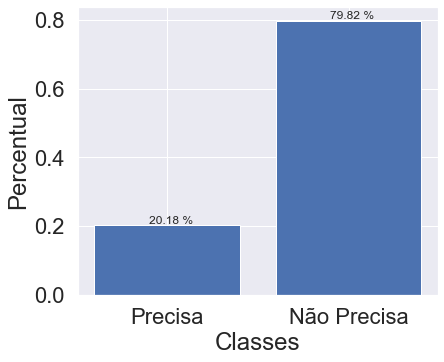

In [330]:
import matplotlib.pyplot as plt
fig = plt.figure( figsize =(5,4))
ax = fig.add_axes([0,0,1,1])
types= ['Precisa', 'Não Precisa']
percent=[pd.DataFrame(target).value_counts(normalize=True)[1],pd.DataFrame(target).value_counts(normalize=True)[0]]
ax.bar(types,percent)
ax.set_ylabel('Percentual')
ax.set_xlabel('Classes')
for index, value in enumerate(percent):
        txt= f'{round(value*100, 2)} %'
        y_coord = value + 0.005
        x_coord=index - 0.1
        ax.text(x=x_coord,y=y_coord, s=txt, fontsize=12)
        ax.grid()
        
plt.show()

Mas a pergunta é como vamos descobrir se o cliente esta precisando ou não do produto. O entendimento das variáveis do dataset e como elas se relacionam com a necessidade ou não do cliente.

# Tratamento dos dados

**Verificação de Dados Nulos** </br>
Acima já fizemos uma pequena visualização dos dados com a verificação do tipo da váriável, Quantitativa ou qualitativa. Agora vamos verificar se algum dado está faltante ou nulo. Para isso, uma verificação se é nulo, e uma soma de todos os resultados de cada váriável, inclusive a variável alvo.

In [359]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14123 entries, 0 to 14122
Data columns (total 70 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      14123 non-null  int64  
 1   var1    14123 non-null  int64  
 2   var2    14123 non-null  int64  
 3   var3    14123 non-null  int64  
 4   var4    14123 non-null  int64  
 5   var5    14123 non-null  int64  
 6   var6    14123 non-null  int64  
 7   var7    14123 non-null  int64  
 8   var8    14123 non-null  int64  
 9   var9    14123 non-null  int64  
 10  var10   14123 non-null  int64  
 11  var11   14123 non-null  int64  
 12  var12   14123 non-null  int64  
 13  var13   14123 non-null  int64  
 14  var14   14123 non-null  int64  
 15  var15   14123 non-null  int64  
 16  var16   14123 non-null  int64  
 17  var17   14123 non-null  int64  
 18  var18   14123 non-null  int64  
 19  var19   14123 non-null  int64  
 20  var20   14123 non-null  int64  
 21  var21   14123 non-null  int64  
 22

In [152]:
verificação_nulos=df_train.isnull().sum()
df_train.isnull().sum()

var1     0
var2     0
var3     0
var4     0
var5     0
        ..
var65    0
var66    0
var67    0
var68    0
y        0
Length: 69, dtype: int64

In [153]:
verificação_nulos.sum()

0

É interessante ver também a tipagem de cada variável, do dataset. Podemos ver que são int64 e float64. O dataset possívelmente
já possue um tratamento previo, caso fosse houve outros tipos, como string, poderia ser utilizando algoritmo e transformação.

**Tipos das variáveis**. O formato da variável

In [154]:
df_train.dtypes.value_counts()

int64      55
float64    14
dtype: int64

In [361]:
df_train.describe()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
count,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,...,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000
mean,17474.649366,9.712667,23.966579,1584.671245,15179.176025,5543.697869,1315.314168,-109.713729,-138.426680,-106.362388,...,-458.540340,-24.210294,0.073086,0.779221,0.028778,-862.721979,-862.762111,-41.252803,-2.154825,0.201798
std,10249.066602,7.269559,218.429664,1118.101765,9994.295223,3329.493664,1210.074896,350.202420,371.128392,311.608454,...,497.945633,154.485314,0.053963,0.234068,0.018681,342.956927,342.855920,199.275514,48.244171,0.401357
min,1.000000,0.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.000000,-999.000000,0.000000,0.000000,0.004267,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,8550.500000,4.000000,38.000000,731.000000,6493.500000,2374.000000,482.000000,16.000000,10.000000,1.000000,...,-999.000000,0.169428,0.040391,0.706357,0.018357,-999.000000,-999.000000,0.117647,0.136029,0.000000
50%,17464.000000,5.000000,53.000000,1461.000000,15309.000000,6159.000000,1558.000000,33.000000,24.000000,3.000000,...,0.009003,0.239625,0.060265,0.877901,0.023480,-999.000000,-999.000000,0.176471,0.176471,0.000000
75%,26358.500000,18.000000,110.000000,2481.000000,23818.000000,8594.000000,2438.000000,35.000000,27.000000,3.000000,...,0.152328,0.341919,0.088831,0.930373,0.034581,-999.000000,-999.000000,0.264706,0.220588,0.000000
max,35306.000000,30.000000,129.000000,3546.000000,32403.000000,11373.000000,3001.000000,36.000000,28.000000,3.000000,...,1.000000,0.934994,0.814846,1.000000,0.387386,1.000000,1.000000,0.911765,1.000000,1.000000


# Tratamento 01 - Correlação

Esse dataset possui um número grande de variaveis, pode ser verificado a correlação entre elas para verificar uma possível redução de dimensionalidade.

Coeficientes de Correlação:

ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;

ρ = 0,7 a 09 (positivo ou negativo): correlação forte;

ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;

ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;

ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

<AxesSubplot:>

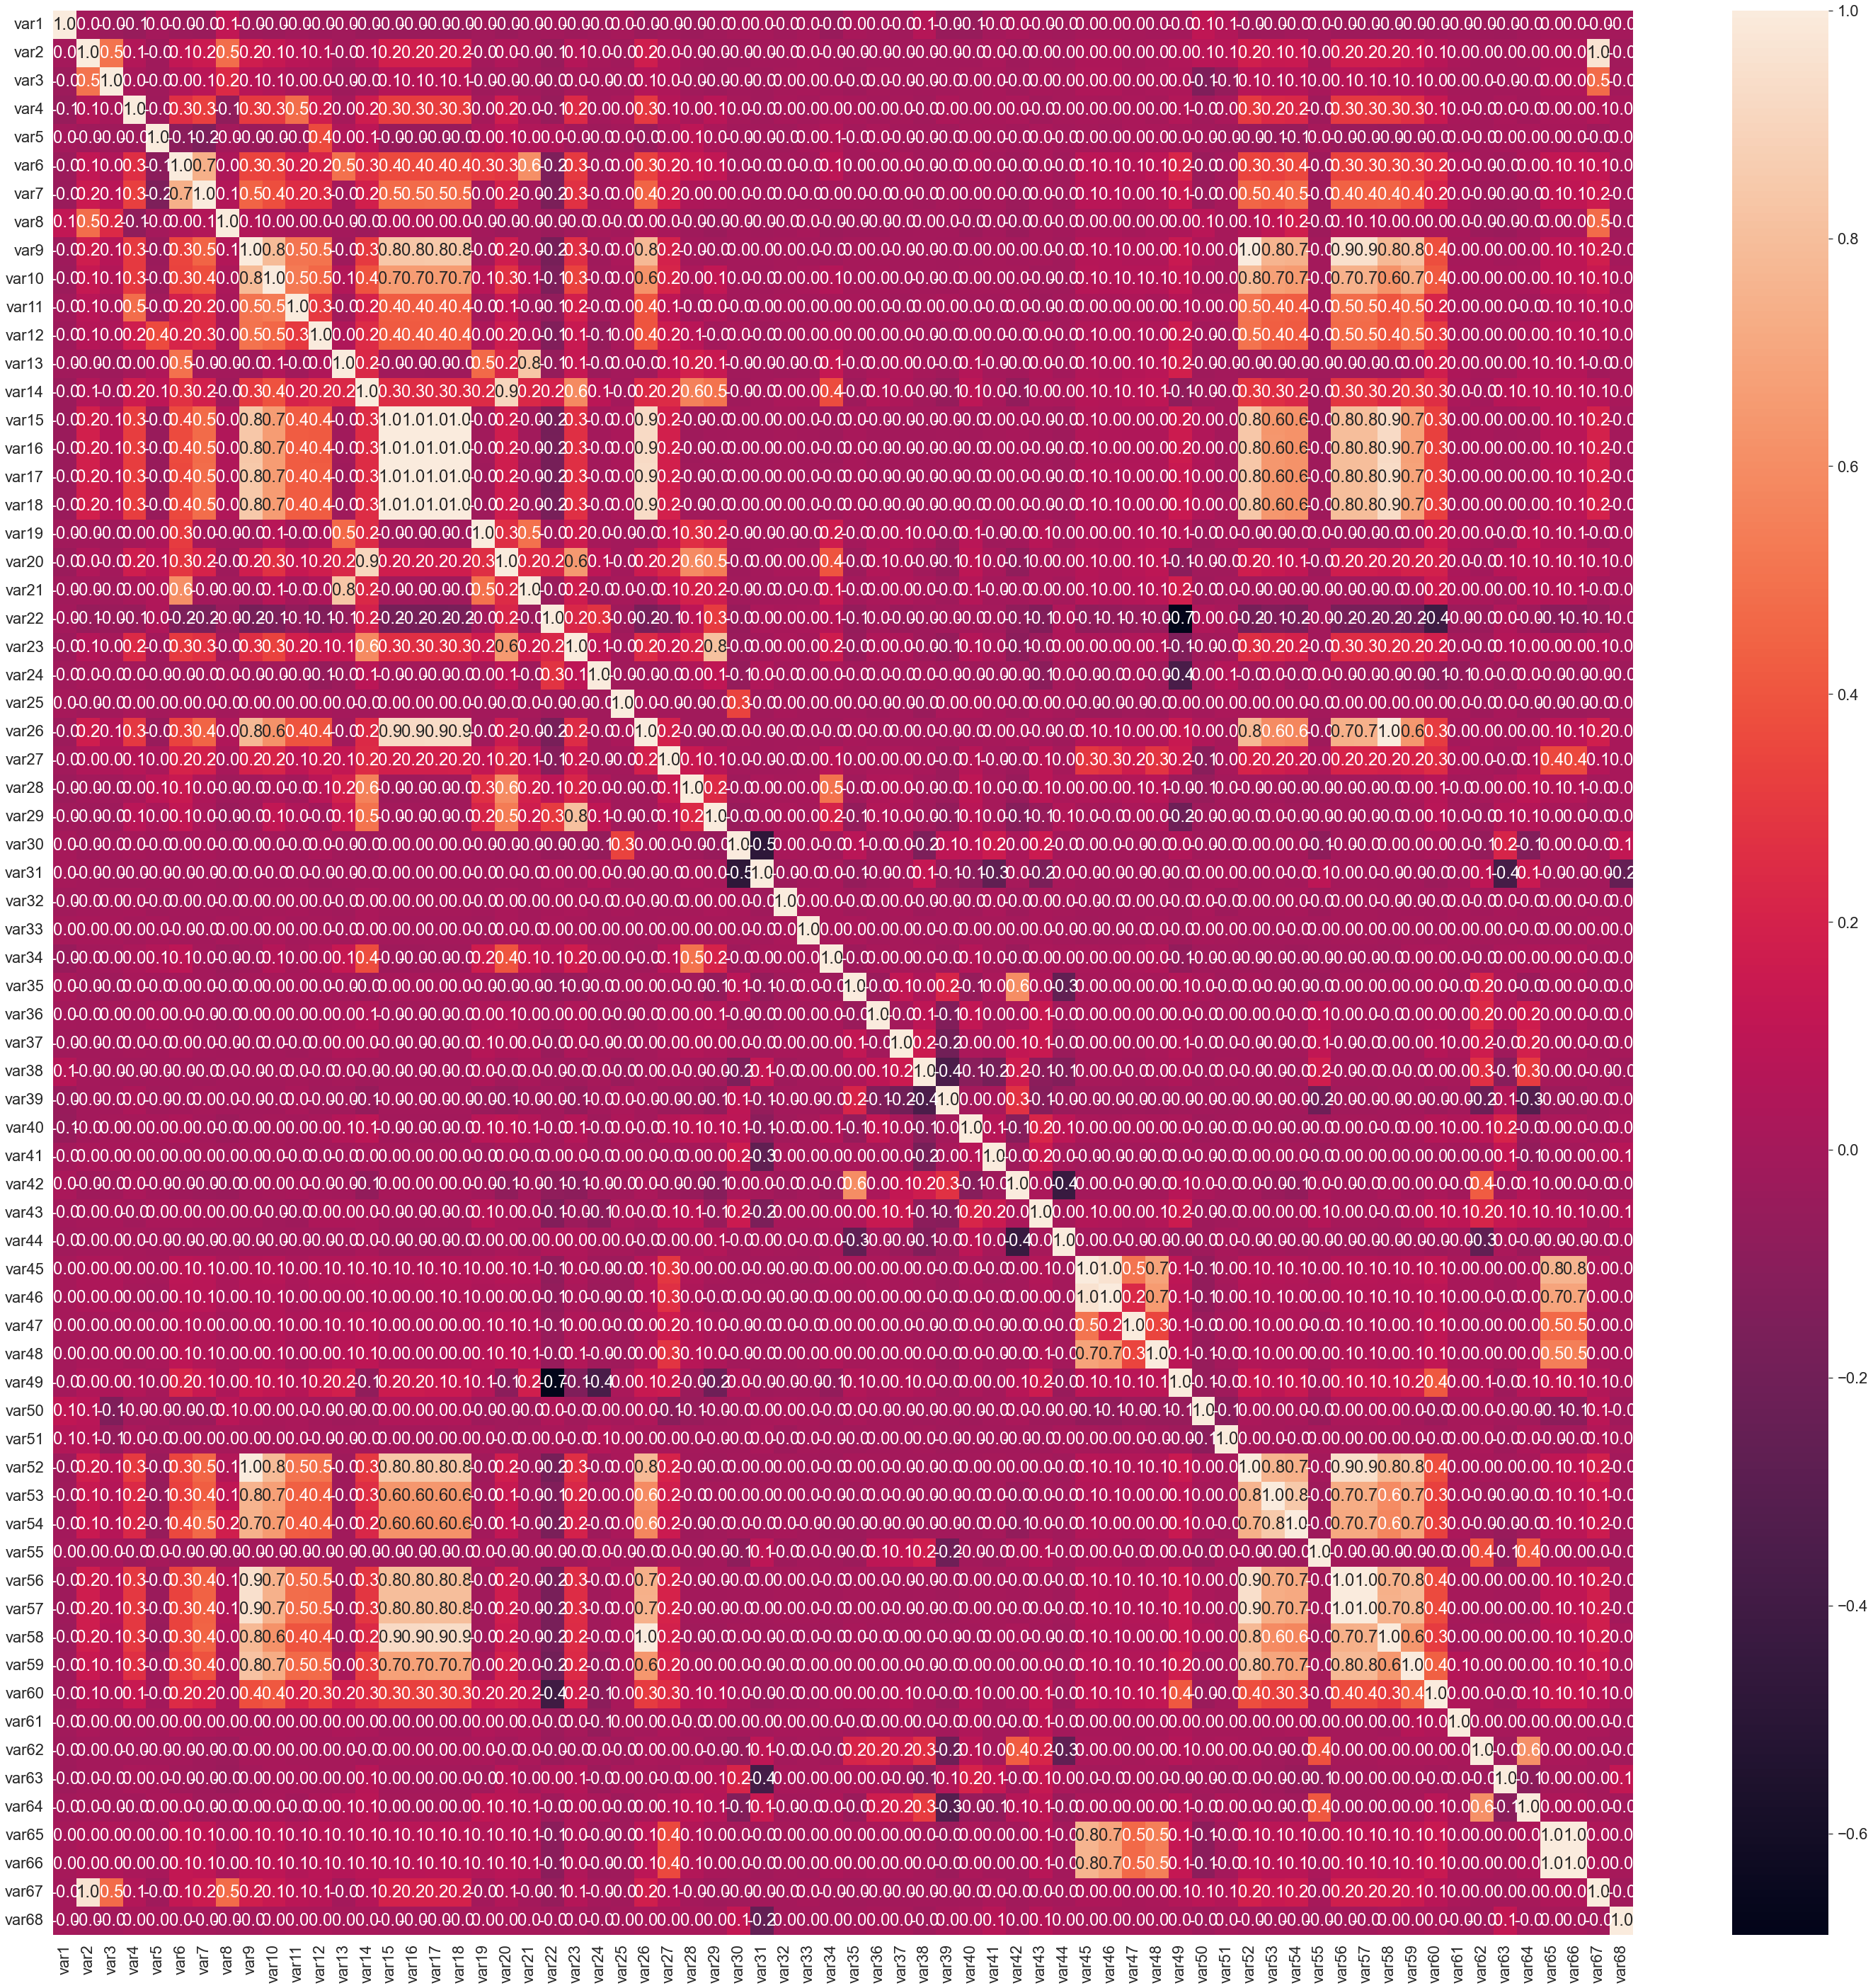

In [360]:

import numpy as np
import seaborn as sns

correlationMatriz= df_vars.corr()
plt.figure(figsize = (50, 50))

sns.heatmap(correlationMatriz, annot = True, fmt = ".1f")

Como existem muitas váriáveis a visualização fica até um pouco complicada. Porém é possível notar que as variáveis var56 e var57
possuem o mesmo resultado de correlação, assim como var9 e var52, var26 e var58, 56 e 57, e var65 e 66. Será feito a remoção de 4 colunas, uma para cada par.

In [156]:
correlationMatriz2 = correlationMatriz[correlationMatriz>0.99]
correlationMatriz2  = correlationMatriz2 .sum()
correlationMax = correlationMatriz2[correlationMatriz2>1]
correlationMax.sort_values(ascending=True)

var9     1.999162
var52    1.999162
var56    1.999289
var57    1.999289
var26    1.999968
var58    1.999968
var65    2.000000
var66    2.000000
var18    3.993550
var15    3.995397
var16    3.995536
var17    3.996738
dtype: float64

In [174]:
df_vars_t1=df_vars.drop(columns=["var52","var57","var58", "var66"])
df_qualitativo_vars_t1=df_Qualitativo[df_Qualitativo['Variavel cod'] != 'var52'].copy()
df_qualitativo_vars_t1=df_qualitativo_vars_t1[df_qualitativo_vars_t1['Variavel cod'] != 'var57'].copy()
df_qualitativo_vars_t1=df_qualitativo_vars_t1[df_qualitativo_vars_t1['Variavel cod'] != 'var58'].copy()
df_qualitativo_vars_t1=df_qualitativo_vars_t1[df_qualitativo_vars_t1['Variavel cod'] != 'var66'].copy()
df_qualitativo_vars_t1
df_quantitativo_vars_t1=df_Quantitativo[df_Quantitativo['Variavel cod'] != 'var52'].copy()
df_quantitativo_vars_t1=df_quantitativo_vars_t1[df_quantitativo_vars_t1['Variavel cod'] != 'var57'].copy()
df_quantitativo_vars_t1=df_quantitativo_vars_t1[df_quantitativo_vars_t1['Variavel cod'] != 'var58'].copy()
df_quantitativo_vars_t1=df_quantitativo_vars_t1[df_quantitativo_vars_t1['Variavel cod'] != 'var66'].copy()
df_quantitativo_vars_t1

,index,Variavel cod,Variavel tipo
54,55,var55,Quantitativo continua
55,56,var56,Quantitativo continua
58,59,var59,Quantitativo continua
59,60,var60,Quantitativo continua
60,61,var61,Quantitativo continua
61,62,var62,Quantitativo continua
62,63,var63,Quantitativo continua
63,64,var64,Quantitativo continua
64,65,var65,Quantitativo continua
23,24,var24,Quantitativo discreto


In [176]:
import pyarrow.parquet as pq
df_vars_t1.to_parquet('../Data/preprossessing/train_t1.parquet')
df_qualitativo_vars_t1.to_parquet('../Data/preprossessing/metadata_qualitativo_t1.parquet')
df_quantitativo_vars_t1.to_parquet('../Data/preprossessing/metadata_quantitativo_t1.parquet')

# Tratamento 02

Muitas features neste dataset possuem valors -999, que poderá ser visto no bloxplot abaixo, esse valor está muito fora da faixa de
valor dos demais dados, neste tratamento será feito a atribuição de zero para o valor -999.

# Boxplot

Em estatística descritiva, diagrama de caixa, diagrama de extremos e quartis, boxplot ou box plot é uma ferramenta gráfica para representar a variação de dados observados de uma variável numérica por meio de quartis (ver figura 1, onde o eixo horizontal representa a variável) https://pt.wikipedia.org/wiki/Diagrama_de_caixa

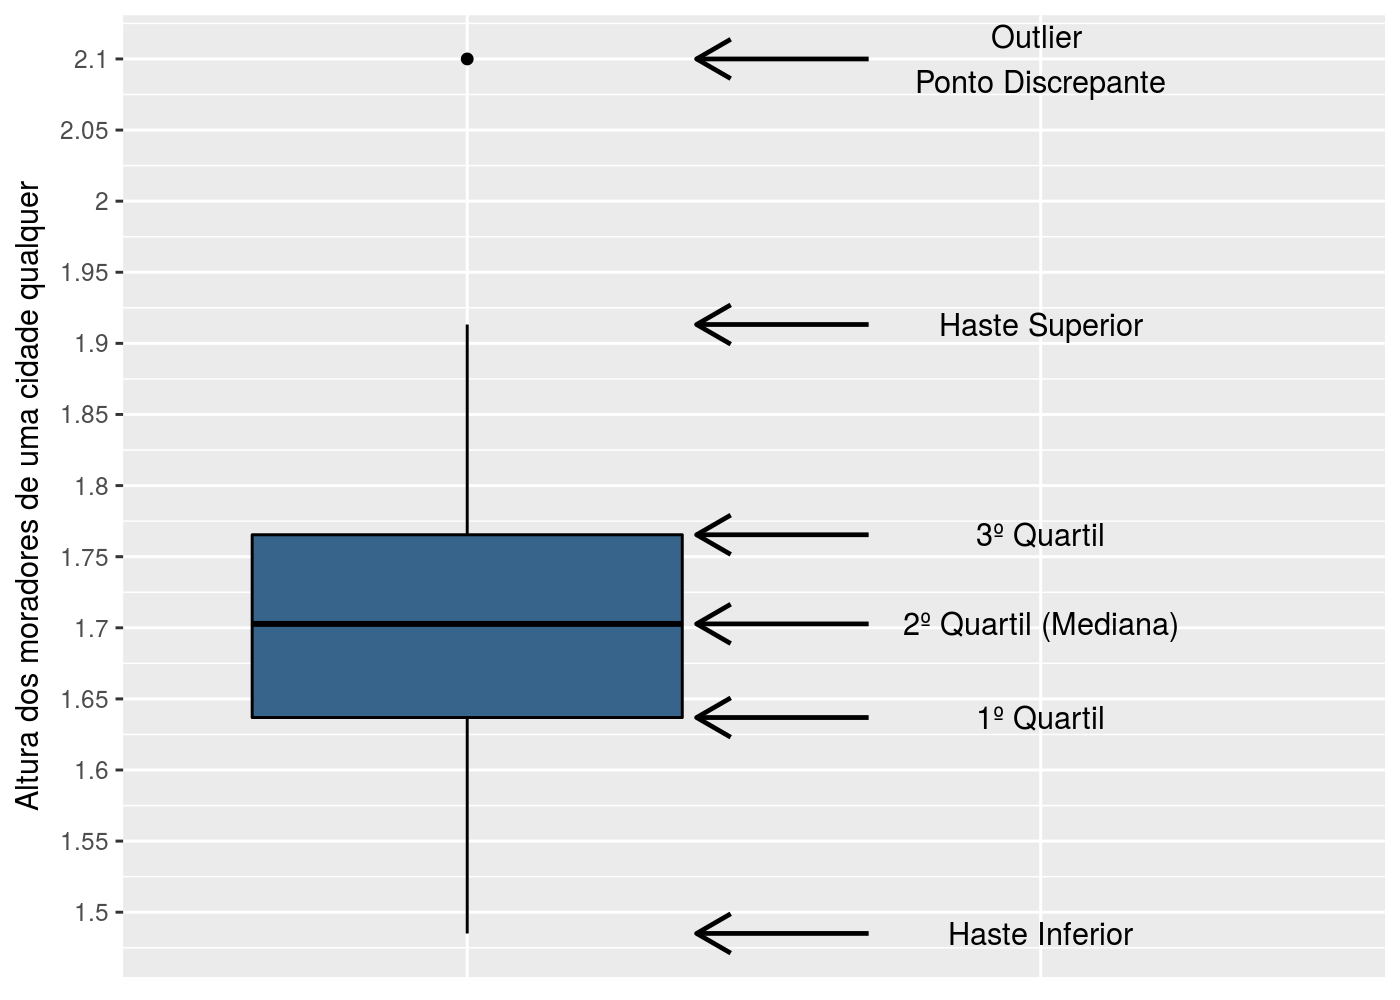

No boxplot abaixo, é possível ver que existe uma diferença de escala entre os dados, e também pode ser visto que pode haver alguns outliers
ou dados que estão um pouco fora do padrão dos demais.

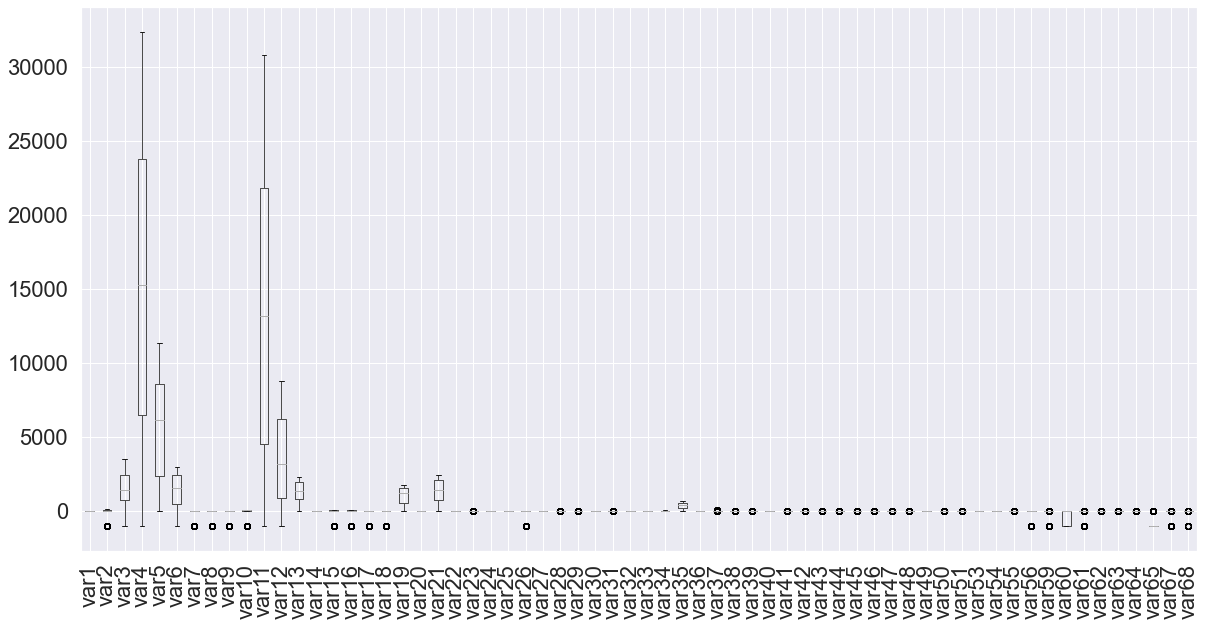

In [159]:
fig = plt.figure(figsize =(20, 10))
# Creating plot
df_vars_t1.boxplot()
plt.xticks(rotation = 90)
# show plot
plt.show()

No boxplot alguns pontos estão fora dos limites do box para variável categorica, por exemplo var2

In [160]:
df_vars_t1

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var56,var59,var60,var61,var62,var63,var64,var65,var67,var68
0,18,19,2853,29442,1386,2435,35,-999,3,63,...,0.137,0.058070,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.132353,0.139706
1,4,110,1986,13684,7189,-999,-999,17,3,63,...,0.308,0.248909,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,0.147059,0.106618
2,0,39,1019,10232,678,791,16,-999,3,63,...,0.213,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,0.382353,0.242647
3,20,39,1751,2689,8235,1042,13,10,1,14,...,0.716,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.147059,0.132353
4,7,44,2262,29428,6031,304,16,-999,3,63,...,0.596,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,0.455882,0.132353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,4,39,2511,28766,1109,2094,31,24,3,-999,...,0.048,0.122448,-999.000000,0.069347,0.036178,0.869828,0.016160,-999.000000,0.455882,0.147059
14119,19,129,1114,-999,6376,-999,-999,27,-999,-999,...,-999.000,-999.000000,-999.000000,0.295418,0.055899,0.921292,0.018293,-999.000000,0.147059,0.198529
14120,27,44,1786,23761,9048,623,35,27,3,14,...,0.029,0.207001,-999.000000,0.203394,0.040697,0.930373,0.009440,-999.000000,0.397059,0.158088
14121,4,89,210,19593,3634,2453,35,27,1,63,...,0.154,0.200405,0.070788,0.381038,0.100384,0.680121,0.041096,-999.000000,0.264706,0.128676


In [161]:
df_vars_t1[df_vars_t1['var2']< 0]

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var56,var59,var60,var61,var62,var63,var64,var65,var67,var68
5,18,-999,-999,16114,208,-999,-999,-999,1,63,...,0.497,-999.000000,0.057837,0.391608,0.080977,0.897074,0.019915,-999.0,-999.000000,0.198529
7,5,-999,-999,25373,9048,-999,-999,-999,1,63,...,0.213,0.247192,-999.000000,0.703803,0.124198,0.828456,0.030033,-999.0,-999.000000,0.301471
27,5,-999,-999,31070,9957,2277,27,-999,3,63,...,0.615,0.151504,0.084066,0.178165,0.061636,0.937437,0.056540,-999.0,-999.000000,0.209559
42,5,-999,-999,17512,9383,522,35,-999,-999,-999,...,-999.000,-999.000000,-999.000000,0.290408,0.051290,0.983855,0.014997,-999.0,-999.000000,0.227941
45,20,-999,-999,29522,5732,2100,35,-999,3,63,...,0.752,0.128349,-999.000000,0.132312,0.048786,0.860747,0.015776,-999.0,-999.000000,0.261029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13948,4,-999,-999,-999,6376,-999,-999,-999,-999,-999,...,-999.000,-999.000000,-999.000000,0.426131,0.244059,0.405651,0.055160,-999.0,-999.000000,0.205882
13975,19,-999,-999,9591,1150,304,16,-999,3,63,...,0.779,0.160303,0.113798,0.319472,0.093933,0.720484,0.044366,-999.0,-999.000000,0.191176
13990,4,-999,-999,21482,3033,1095,35,-999,3,63,...,0.061,0.136926,0.041843,0.149192,0.092177,0.885974,0.017603,-999.0,0.323529,0.172794
13991,4,-999,-999,-999,6376,-999,-999,-999,-999,-999,...,-999.000,-999.000000,-999.000000,0.210280,0.159494,0.893037,0.037621,-999.0,-999.000000,0.132353


Essa variável esta alterando até 129, mas existe um valor -999 em alguns campos.

In [162]:
print("Min: {} - Max: {}".format(df_vars_t1 ['var2'].min(), df_vars_t1 ['var2'].max()))

Min: -999 - Max: 129


Olhando para os dados dessa forma, notase que as categórias variam de 1 a 129. Mas existem o -999, que pode indicar um valor nulo, 
ou algum erro de digitação ou algum outro tipo de erro.

In [163]:
sorted(set(df_vars_t1 ['var2']))

[-999,
 1,
 2,
 5,
 6,
 7,
 8,
 9,
 11,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 24,
 26,
 28,
 30,
 37,
 38,
 39,
 42,
 44,
 45,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 62,
 64,
 66,
 67,
 68,
 69,
 72,
 73,
 74,
 75,
 76,
 77,
 79,
 80,
 81,
 82,
 86,
 89,
 91,
 92,
 94,
 99,
 101,
 102,
 103,
 104,
 106,
 108,
 110,
 111,
 112,
 113,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 128,
 129]

In [164]:
dict_999 = {-999: 0}

In [165]:
df_vars_t1[df_vars_t1['var2'] == -999]

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var56,var59,var60,var61,var62,var63,var64,var65,var67,var68
5,18,-999,-999,16114,208,-999,-999,-999,1,63,...,0.497,-999.000000,0.057837,0.391608,0.080977,0.897074,0.019915,-999.0,-999.000000,0.198529
7,5,-999,-999,25373,9048,-999,-999,-999,1,63,...,0.213,0.247192,-999.000000,0.703803,0.124198,0.828456,0.030033,-999.0,-999.000000,0.301471
27,5,-999,-999,31070,9957,2277,27,-999,3,63,...,0.615,0.151504,0.084066,0.178165,0.061636,0.937437,0.056540,-999.0,-999.000000,0.209559
42,5,-999,-999,17512,9383,522,35,-999,-999,-999,...,-999.000,-999.000000,-999.000000,0.290408,0.051290,0.983855,0.014997,-999.0,-999.000000,0.227941
45,20,-999,-999,29522,5732,2100,35,-999,3,63,...,0.752,0.128349,-999.000000,0.132312,0.048786,0.860747,0.015776,-999.0,-999.000000,0.261029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13948,4,-999,-999,-999,6376,-999,-999,-999,-999,-999,...,-999.000,-999.000000,-999.000000,0.426131,0.244059,0.405651,0.055160,-999.0,-999.000000,0.205882
13975,19,-999,-999,9591,1150,304,16,-999,3,63,...,0.779,0.160303,0.113798,0.319472,0.093933,0.720484,0.044366,-999.0,-999.000000,0.191176
13990,4,-999,-999,21482,3033,1095,35,-999,3,63,...,0.061,0.136926,0.041843,0.149192,0.092177,0.885974,0.017603,-999.0,0.323529,0.172794
13991,4,-999,-999,-999,6376,-999,-999,-999,-999,-999,...,-999.000,-999.000000,-999.000000,0.210280,0.159494,0.893037,0.037621,-999.0,-999.000000,0.132353


In [166]:
df_vars_t2 = df_vars_t1.replace(-999, 0)
df_vars_t2[df_vars_t2['var2'] == -999]

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var56,var59,var60,var61,var62,var63,var64,var65,var67,var68


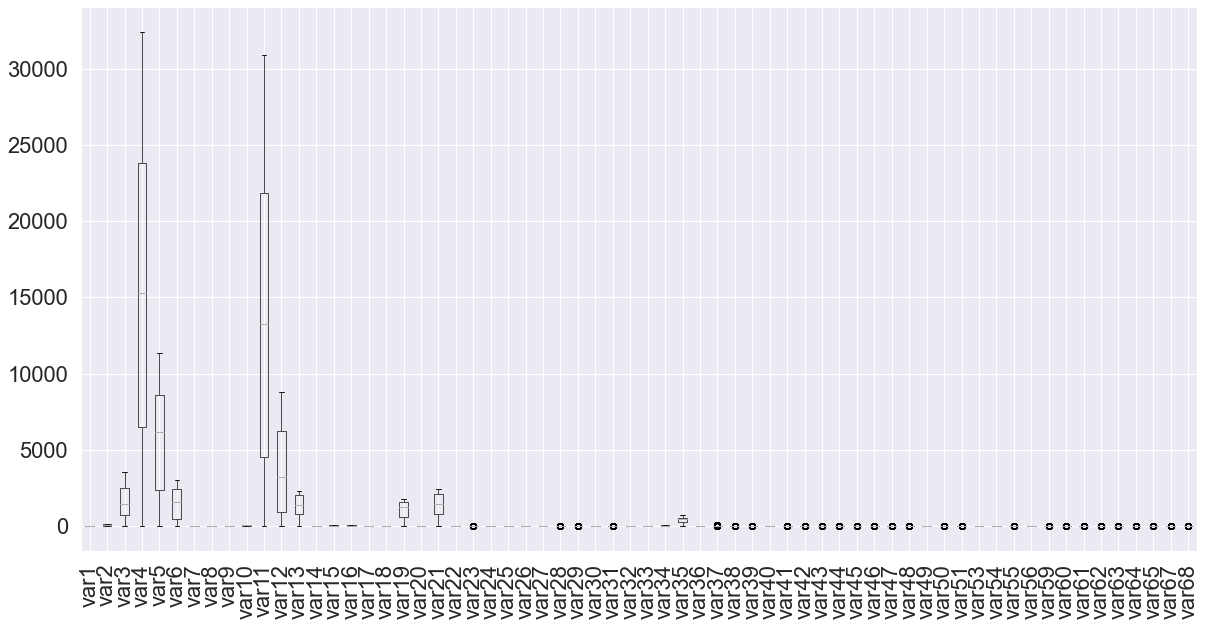

In [261]:
fig = plt.figure(figsize =(20, 10))
# Creating plot
df_vars_t2.boxplot()
plt.xticks(rotation = 90)
# show plot
plt.show()

In [168]:
df_vars_t2.to_parquet('../Data/preprossessing/train_t2.parquet')

# Tratamento 3 - OneHotEnconder - Não plicado

Para o tratamento 3 pode ser pensado em aplicar os OneHotEncoder para as variáveis Qualitativas Nominais. Porém se observado no boxplot, a var4 e
algumas outras, possuem uma faixa ampla de valores, sendo assim nao seria possivel aplicar essa medida para essas em questão.

Esse tratamento não foi executado


In [259]:
df_Qualitativo_nominal

,index,Variavel cod,Variavel tipo
0,1,var1,Qualitativo nominal
1,2,var2,Qualitativo nominal
2,3,var3,Qualitativo nominal
3,4,var4,Qualitativo nominal
4,5,var5,Qualitativo nominal
5,6,var6,Qualitativo nominal
6,7,var7,Qualitativo nominal
7,8,var8,Qualitativo nominal
8,9,var9,Qualitativo nominal
9,10,var10,Qualitativo nominal


In [283]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(df_vars_t2[['var8']]).toarray())

df_vars_t21=pd.concat([df_vars_t2.drop(columns=['var8']), enc_df ], axis=1)
df_vars_t21

,var1,var2,var3,var4,var5,var6,var7,var9,var10,var11,...,19,20,21,22,23,24,25,26,27,28
0,18,19,2853,29442,1386,2435,35,3,63,6498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,110,1986,13684,7189,0,0,3,63,13989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,39,1019,10232,678,791,16,3,63,9739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,39,1751,2689,8235,1042,13,1,14,2890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,44,2262,29428,6031,304,16,3,63,13541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,4,39,2511,28766,1109,2094,31,3,0,5082,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14119,19,129,1114,0,6376,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14120,27,44,1786,23761,9048,623,35,3,14,1249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14121,4,89,210,19593,3634,2453,35,1,63,21128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [258]:
df_vars_t2[df_Qualitativo_nominal['Variavel cod']]

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var30,var31,var33,var34,var35,var36,var37,var38,var39,var41
0,18,19,2853,29442,1386,2435,35,0,3,63,...,2,0,3,44,463,27,2,0,4,3
1,4,110,1986,13684,7189,0,0,17,3,63,...,1,0,0,1,532,2,1,0,4,3
2,0,39,1019,10232,678,791,16,0,3,63,...,1,0,1,3,81,26,3,0,4,3
3,20,39,1751,2689,8235,1042,13,10,1,14,...,2,0,0,11,414,27,0,0,4,3
4,7,44,2262,29428,6031,304,16,0,3,63,...,1,0,4,3,567,8,3,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,4,39,2511,28766,1109,2094,31,24,3,0,...,1,0,5,12,314,0,1,0,4,3
14119,19,129,1114,0,6376,0,0,27,0,0,...,1,0,6,25,532,27,1,0,4,1
14120,27,44,1786,23761,9048,623,35,27,3,14,...,1,0,3,44,362,2,0,0,4,3
14121,4,89,210,19593,3634,2453,35,27,1,63,...,2,0,2,24,553,0,18,0,4,3


In [278]:
df_vars_t2['var8'].max()

28

# Tratamento 4 - Normalização

A normalização/escalonamento (geralmente usada de forma intercambiável com padronização) é usada para transformar os valores reais de variáveis ​​numéricas de uma maneira que fornece propriedades úteis para aprendizado de máquina. Muitos algoritmos como Logistic Regression, Support Vector Machine, K Nearest Neighbors e Naive Bayes, assumem que todos os recursos estão centrados em torno de zero e têm variações que estão no mesmo nível de ordem. Se um recurso específico em um conjunto de dados tiver uma variação maior em ordem de magnitude do que outros recursos, o modelo pode não entender todos os recursos corretamente e pode ter um desempenho ruim

Aplicação de um algoritmo para padronização das features, aplicando o algoritmo StandardScale e gerar os dados resultantes chamados de tratamento 04.

In [299]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
df_vars_t4=standardScaler.fit(df_vars_t2)
df_vars_t4 = standardScaler.transform(df_vars_t2)
df_vars_t4= pd.DataFrame(data =df_vars_t4, columns = df_vars_t2.keys())
df_vars_t4.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var56,var59,var60,var61,var62,var63,var64,var65,var67,var68
0,1.140045,-1.200972,1.184264,1.435552,-1.248792,1.004412,0.822890,-1.768495,0.754439,0.630301,...,-0.868044,-0.948206,1.111108,-0.853494,-0.313932,-0.626021,-0.252854,1.593674,-0.519461,-0.702658
1,-0.785862,1.107748,0.346750,-0.157886,0.494177,-1.472693,-1.876471,-0.114979,0.754439,0.630301,...,-0.369948,0.451481,-0.605076,-1.849443,-0.038823,-0.022451,-0.506560,-0.308615,-0.403632,-1.287610
2,-1.336121,-0.693561,-0.587363,-0.506950,-1.461444,-0.668015,-0.642477,-1.768495,0.754439,0.630301,...,-0.646668,0.199254,-0.605076,-0.443988,-0.408436,0.861348,-0.548274,-0.308615,1.449624,1.117192
3,1.415175,-0.693561,0.119742,-1.269693,0.808350,-0.412675,-0.873851,-0.795839,-1.012697,-1.237435,...,0.818492,1.188670,-0.605076,0.616787,-0.533435,0.736323,-0.272686,2.419699,-0.403632,-0.832647
4,-0.373168,-0.566708,0.613364,1.434137,0.146364,-1.163436,-0.642477,-1.768495,0.754439,0.630301,...,0.468951,0.016783,-0.488111,-0.266589,-0.258716,0.542318,-0.430653,-0.308615,2.028766,-0.832647


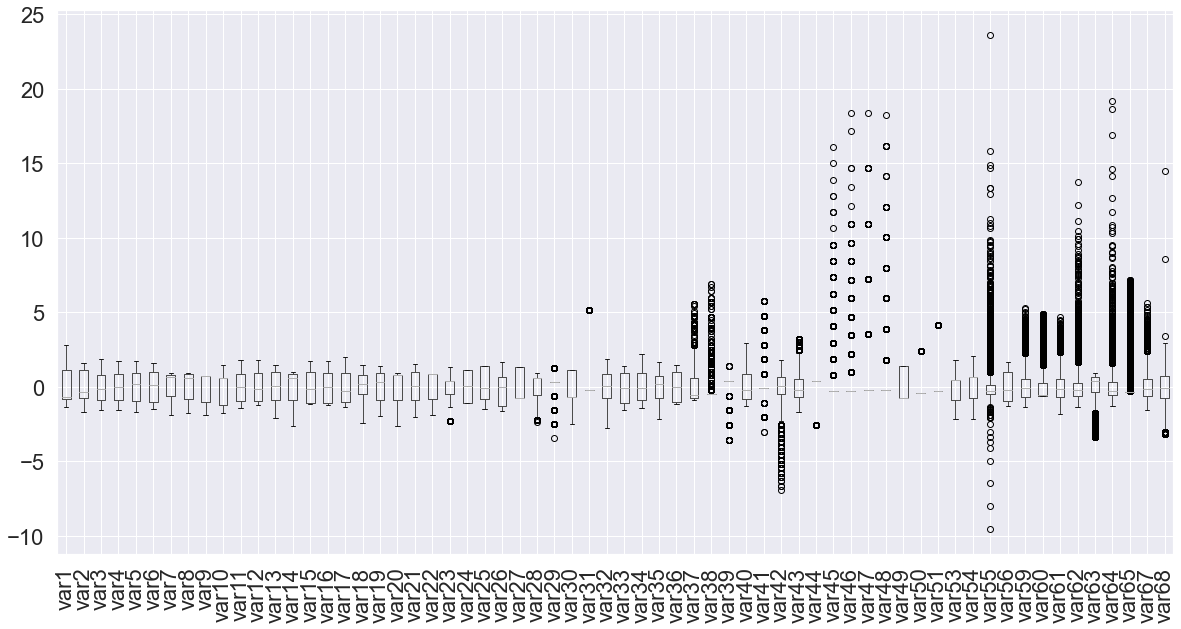

In [300]:
fig = plt.figure(figsize =(20, 10))
# Creating plot
df_vars_t3.boxplot()
plt.xticks(rotation = 90)
# show plot
plt.show()

# Tratamento 5 - Transformação

Neste tratamento será aplicado um algoritmo de preprossessamento para transformação das features em resultados mais parecidos com 
dados gaussianos.

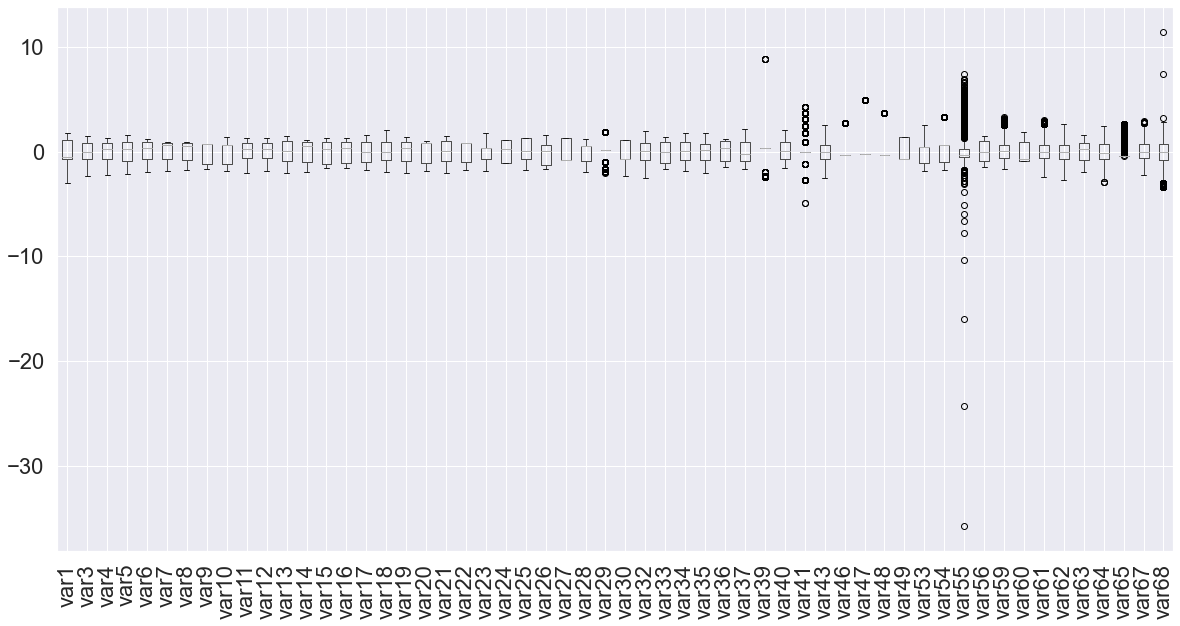

In [471]:
import numpy as np
from sklearn.preprocessing import PowerTransformer


normalize = PowerTransformer()
df_vars_t7=df_vars_t2.drop(columns=ignore_vars)
df_vars_t5=normalize.fit(df_vars_t7)
df_vars_t5 = normalize.transform(df_vars_t7)
df_vars_t5 = pd.DataFrame(data =df_vars_t5, columns = df_vars_t7.keys())
df_vars_t5.head()


fig = plt.figure(figsize =(20, 10))
# Creating plot
df_vars_t5.boxplot()
plt.xticks(rotation = 90)
# show plot
plt.show()

# Tratamento 06

Divisão do Dataset conforme as faixas de valores para interpretação dos dados. No grafico de box é possivel perceber que algumas features estão com intervalo de variação maior que outras, e também que as informações contidas no dataset metadata aparenta não estar de acordo com os dados do dataset train.

In [590]:
categorics = []
bin_features = []
ignore_features = []

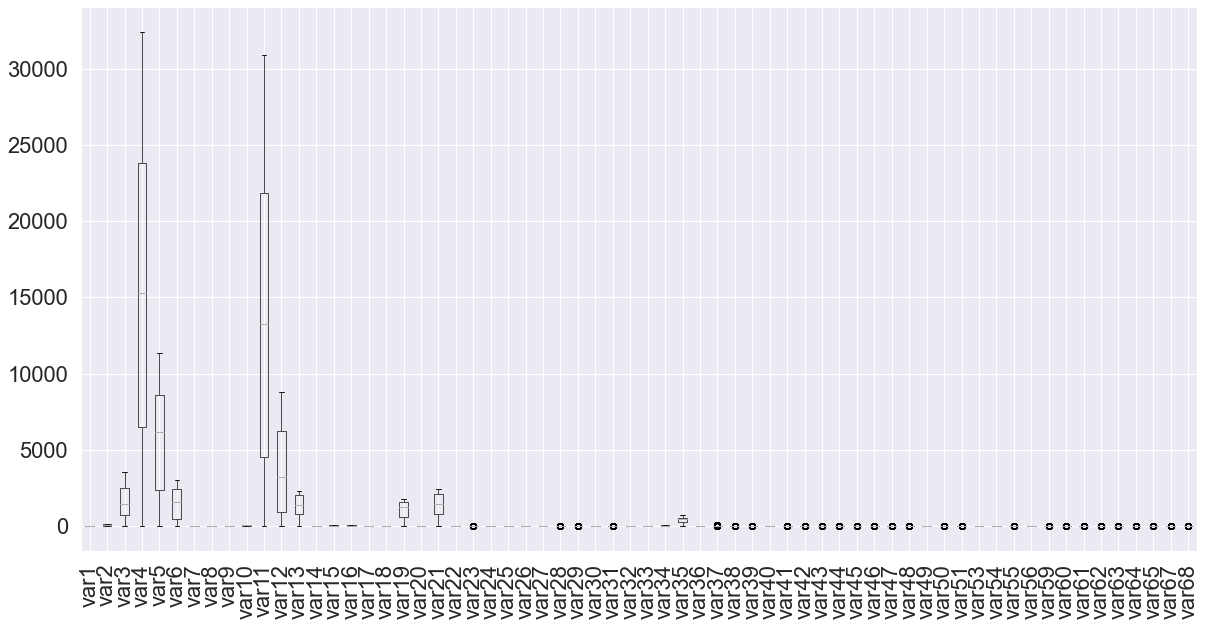

In [312]:
fig = plt.figure(figsize =(20, 10))
# Creating plot
df_vars_t2.boxplot()
plt.xticks(rotation = 90)
# show plot
plt.show()

In [381]:
dict_vars = {"Nome":[],"Intervalo":[]};
df_1 = pd.DataFrame()
for var in df_vars_t2:
    dict_vars['Nome'].append(var)
    dict_vars['Intervalo'].append(df_vars_t2[var].max()-df_vars_t2[var].min())


In [383]:
df_vars_t6=pd.DataFrame(dict_vars)
df_vars_t6

,Nome,Intervalo
0,var1,30.000000
1,var2,129.000000
2,var3,3546.000000
3,var4,32403.000000
4,var5,11373.000000
...,...,...
59,var63,1.000000
60,var64,0.383120
61,var65,1.000000
62,var67,0.911765


# **Diferença Menor que 1**

Algumas features estão em um intervalo entre 0 e 1, distribuidas de forma continua. Elas apresentam uma tendência superior de calda.

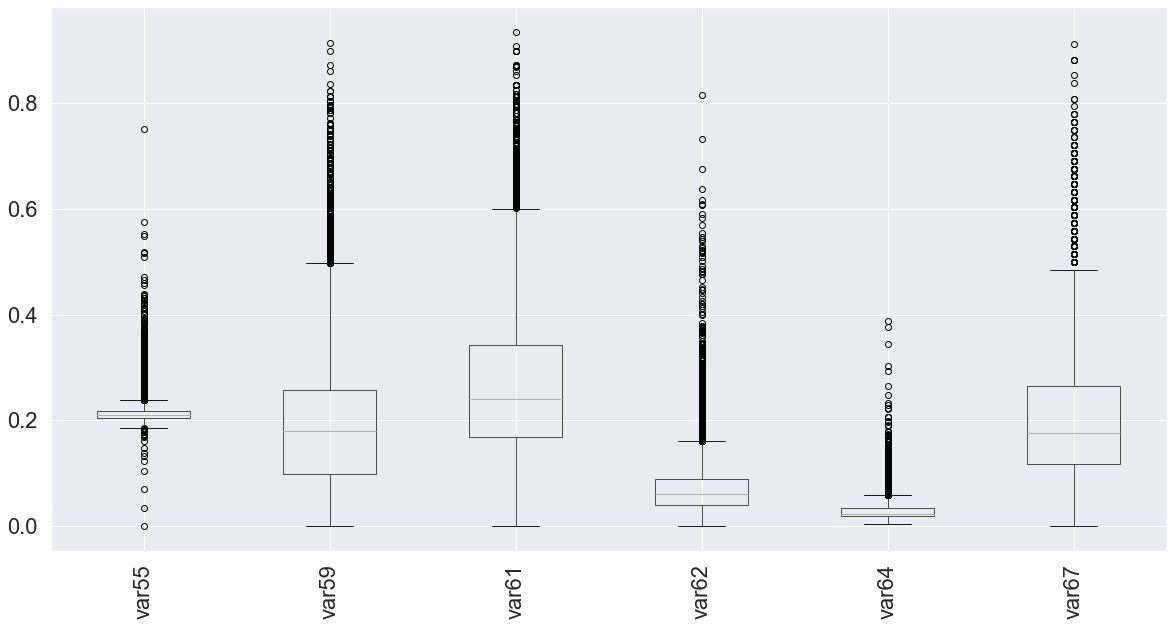

In [428]:
df_menor_um = df_vars_t6[df_vars_t6['Intervalo']<1].copy()
df_menor_um
features_menor_um = df_menor_um ['Nome'].values.tolist()
df_vars_t6_menor_um = df_vars_t2[features_menor_um].copy()
fig = plt.figure(figsize =(20, 10))
# Creating plot
df_vars_t6_menor_um.boxplot()
plt.xticks(rotation = 90)
# show plot
plt.show()

**Tratamento_1_1*

O Power transformer ajuda a comprimir mais os dados dentro dos box.

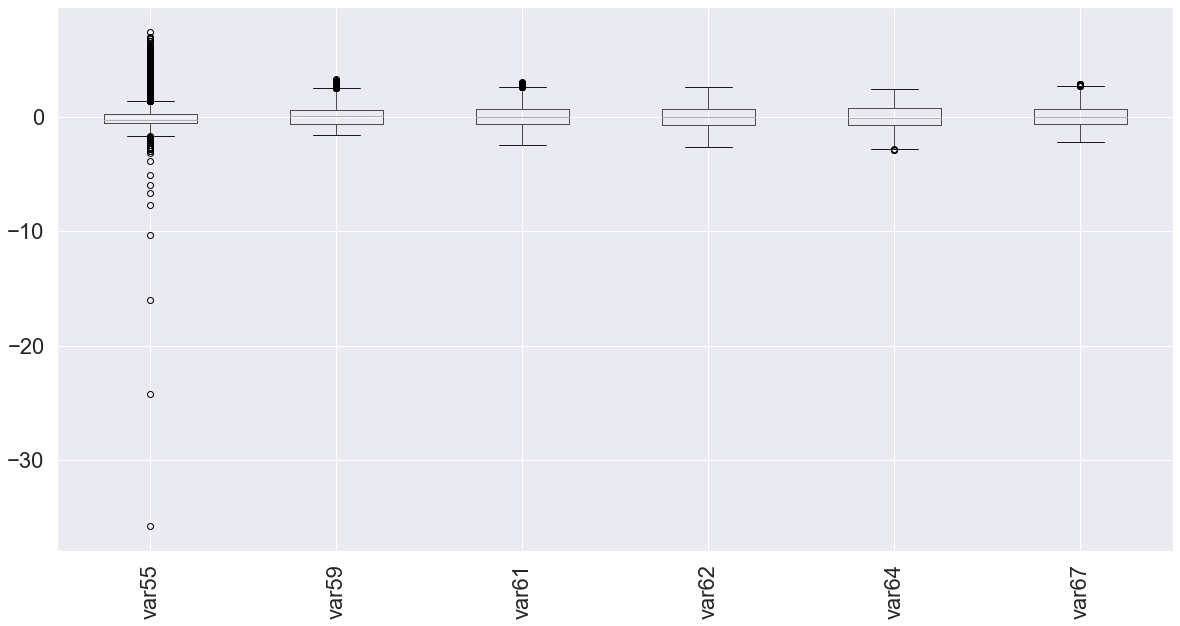

In [435]:
import numpy as np
from sklearn.preprocessing import PowerTransformer


normalize = PowerTransformer()
df_vars_t6_menor_um_2=normalize.fit(df_vars_t6_menor_um)
df_vars_t6_menor_um_2 = normalize.transform(df_vars_t6_menor_um)
df_vars_t6_menor_um_2= pd.DataFrame(data =df_vars_t6_menor_um_2, columns = df_vars_t6_menor_um.keys())
df_vars_t6_menor_um_2.head()


fig = plt.figure(figsize =(20, 10))
# Creating plot
df_vars_t6_menor_um_2.boxplot()
plt.xticks(rotation = 90)
# show plot
plt.show()

# **Diferença Igual a UM**

Os dados igual a um são na maioria binários, zero ou 1. Alguns são continuos, var60, var63, var65 e var68. Na var65 praticamento todos os dados são zero, atribuidos em substituíção ao -999.

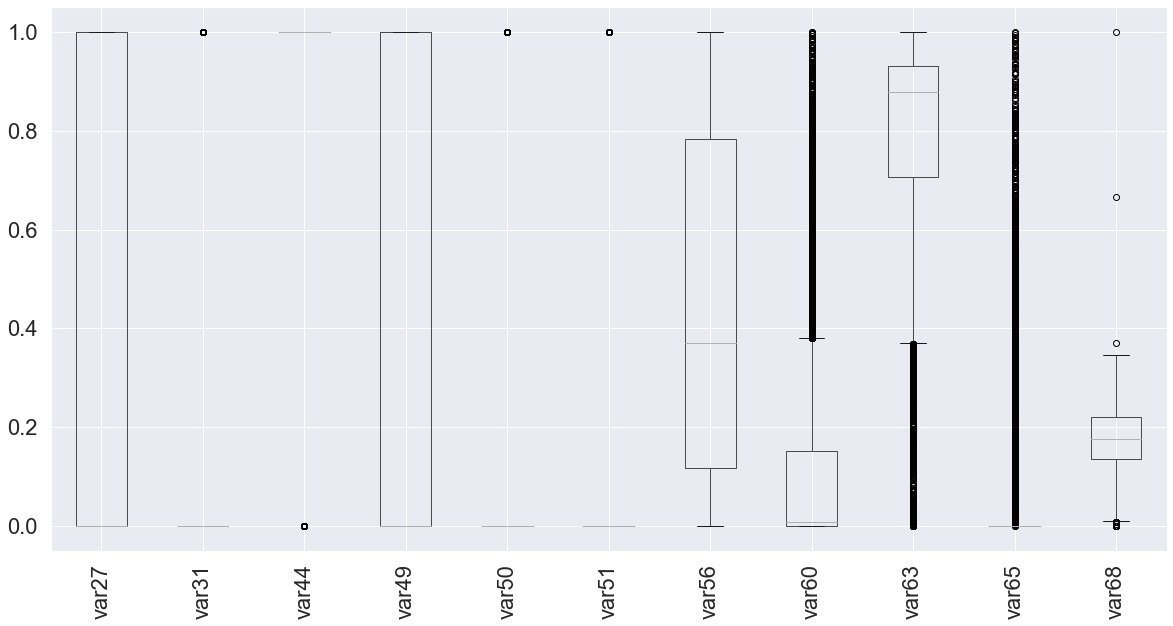

In [429]:
df_igual_um = df_vars_t6[df_vars_t6['Intervalo']==1].copy()
features_igual_um = df_igual_um ['Nome'].values.tolist()
df_vars_t6_igual_um = df_vars_t2[features_igual_um].copy()
fig = plt.figure(figsize =(20, 10))
# Creating plot
df_vars_t6_igual_um.boxplot()
plt.xticks(rotation = 90)
# show plot
plt.show()

In [497]:
df_vars_t6_igual_um.value_counts()

var27  var31  var44  var49  var50  var51  var56  var60     var63     var65  var68   
0      1      1      0      0      0      0.000  0.000000  0.000000  0.0    0.066176    4
       0      1      0      0      0      0.000  0.000000  0.887992  0.0    0.095588    3
                                                           0.934410  0.0    0.180147    3
                                                           0.915237  0.0    0.121324    3
                                                           0.913219  0.0    0.169118    3
                                                                                       ..
                                          0.877  0.000000  0.680121  0.0    0.194853    1
                                                           0.756811  0.0    0.180147    1
                                                           0.879919  0.0    0.110294    1
                                                           0.889001  0.0    0.172794    1
1      1      1

In [593]:
df_vars_t6_igual_um_con = df_vars_t6_igual_um[['var56', 'var60','var63','var65','var68' ]]
df_vars_t6_igual_um_dis = df_vars_t6_igual_um[['var27', 'var31','var44', 'var49',  'var50',  'var51']]

In [591]:
bin_features.append(['var31', 'var44', 'var50', 'var51'])

# Menor que Dez

In [ ]:
Os dados menores que 

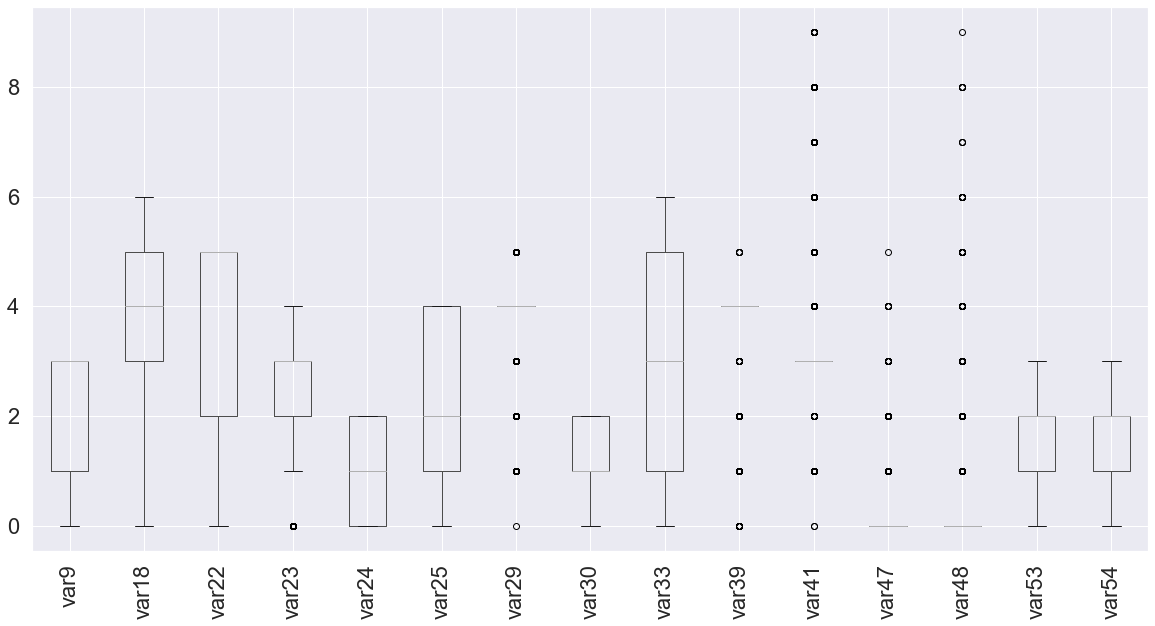

In [431]:
df_menor_dez = df_vars_t6[df_vars_t6['Intervalo']<10].copy()
df_menor_dez = df_menor_dez[df_menor_dez['Intervalo']>1].copy()
features_menor_dez = df_menor_dez ['Nome'].values.tolist()
df_vars_t6_menor_dez = df_vars_t2[features_menor_dez].copy()
fig = plt.figure(figsize =(20, 10))
# Creating plot
df_vars_t6_menor_dez.boxplot()
plt.xticks(rotation = 90)
# show plot
plt.show()

In [569]:
df_vars_t6_menor_dez['var29'].value_counts()

4    9790
5    1505
2    1422
1    1139
3     266
0       1
Name: var29, dtype: int64

In [586]:
df_vars_t6_menor_dez_dis=df_vars_t6_menor_dez[['var29', 'var39', 'var41', 'var47', 'var48']].copy()
df_vars_t6_menor_dez_con=df_vars_t6_menor_dez[['var9', 'var18', 'var22', 'var23', 
                                                                   'var24', 'var25', 'var30', 'var33', 'var53', 'var54']].copy()
categorics=df_vars_t6_menor_dez_dis

# Menor que Cem

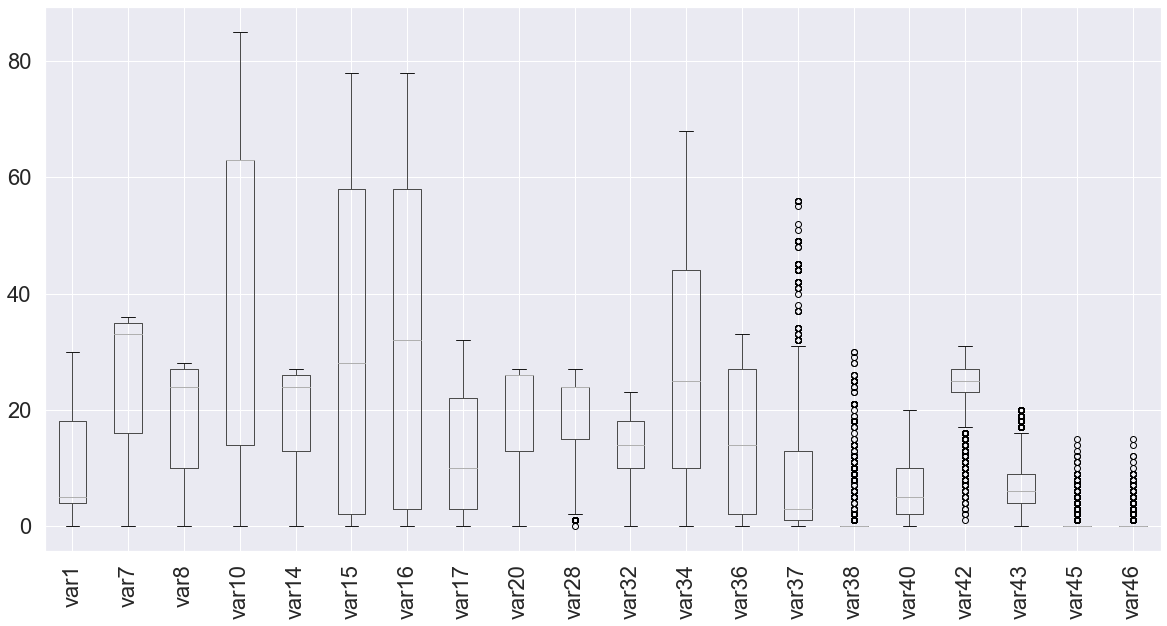

In [432]:
df_menor_cem = df_vars_t6[df_vars_t6['Intervalo']<100].copy()
df_menor_cem = df_menor_cem[df_menor_cem['Intervalo']>10].copy()
features_menor_cem = df_menor_cem ['Nome'].values.tolist()
df_vars_t6_menor_cem = df_vars_t2[features_menor_cem].copy()
fig = plt.figure(figsize =(20, 10))
# Creating plot
df_vars_t6_menor_cem.boxplot()
plt.xticks(rotation = 90)
# show plot
plt.show()

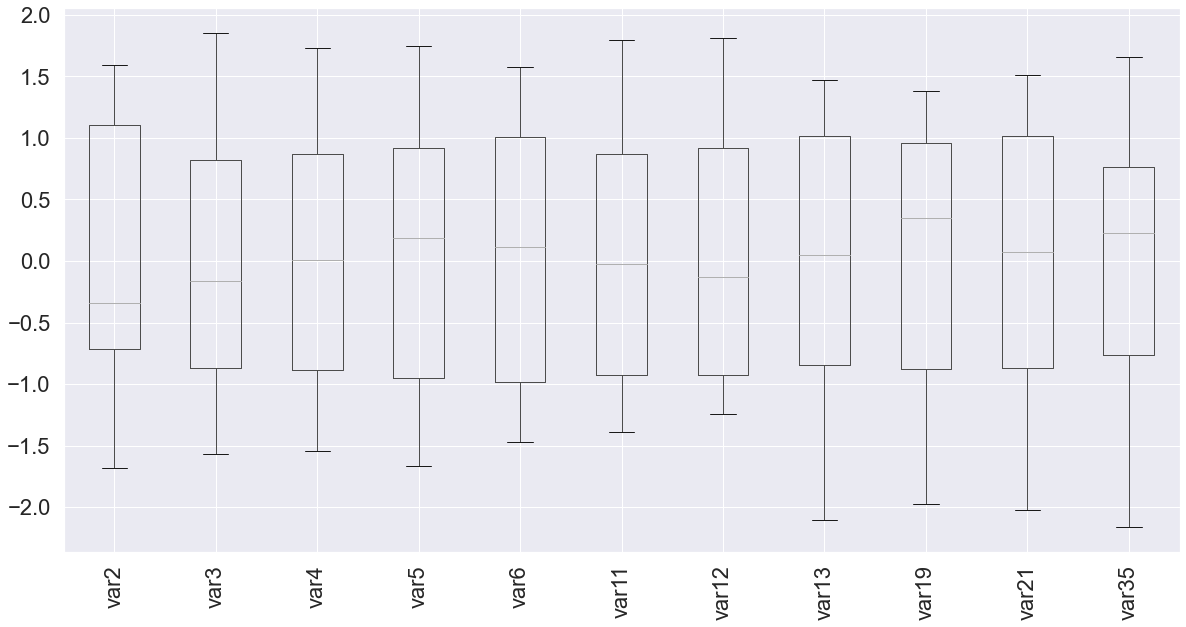

In [568]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
df_vars_t6_maior_cem_2=standardScaler.fit(df_vars_t6_maior_cem)
df_vars_t6_maior_cem_2= standardScaler.transform(df_vars_t6_maior_cem)
df_vars_t6_maior_cem_2= pd.DataFrame(data =df_vars_t4, columns = df_vars_t6_maior_cem.keys())


fig = plt.figure(figsize =(20, 10))
# Creating plot
df_vars_t6_maior_cem_2.boxplot()
plt.xticks(rotation = 90)
# show plot
plt.show()

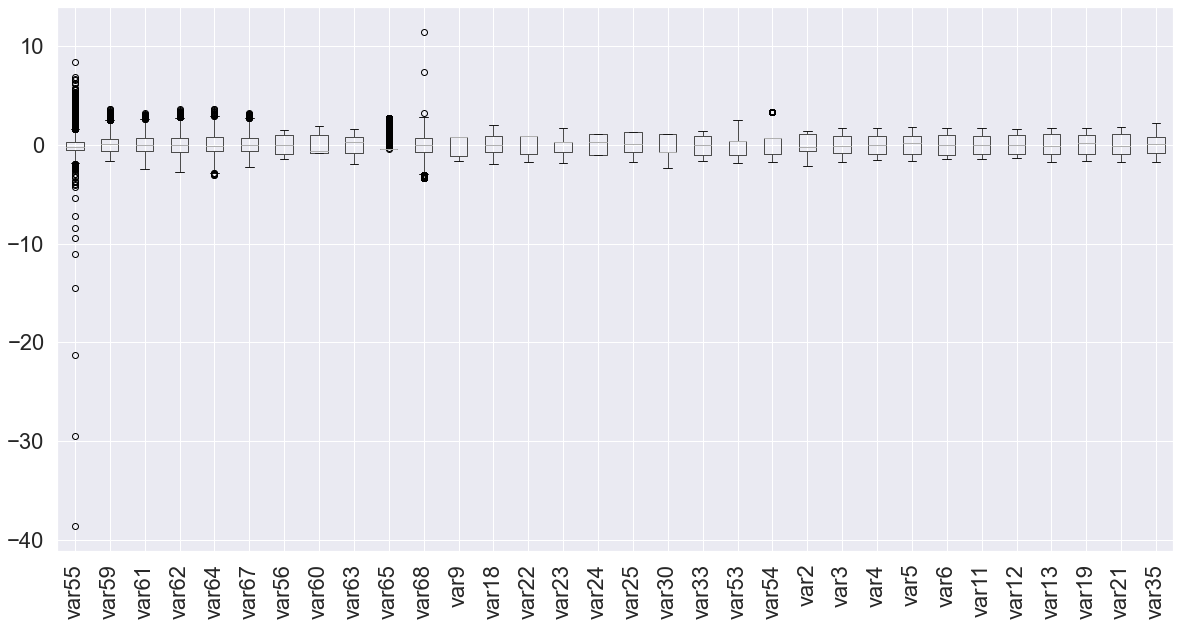

In [600]:
df_vars_t6_pos=pd.concat([df_vars_t6_menor_um_2, 
                          df_vars_t6_igual_um_con, 
                          df_vars_t6_menor_dez_con,
                          df_vars_t6_maior_cem_2], axis=1)
df_vars_t6_dis=pd.concat([df_vars_t6_igual_um_dis, df_vars_t6_menor_dez_dis],axis=1)
normalize = PowerTransformer()
df_vars_t6_pos_3=normalize.fit(df_vars_t6_pos)
df_vars_t6_pos_3 = normalize.transform(df_vars_t6_pos)
df_vars_t6_pos_3= pd.DataFrame(data =df_vars_t6_pos_3, columns = df_vars_t6_pos.keys())
fig = plt.figure(figsize =(20, 10))
# Creating plot
df_vars_t6_pos_3.boxplot()
plt.xticks(rotation = 90)
# show plot
plt.show()

In [601]:
df_vars_t6_pos_c=pd.concat([df_vars_t6_pos_3, df_vars_t6_dis], axis=1)

# Tratamento 07 - Remoção features -999

Um tratamento possível é remover as features onde aparece o -999, esse tratamento foi realizado, porém não houve ganho nos resultados.
Na verdade caiu bastante a acuária.

In [492]:
df_vars_t7 = df_vars_t1.copy()
for var in df_vars_t1:
    if df_vars_t1[var].min() == -999:
        df_vars_t7.drop(columns=var, inplace=True)
df_vars_t7

,var1,var5,var13,var14,var19,var20,var21,var22,var23,var24,...,var48,var49,var50,var51,var53,var54,var55,var62,var63,var64
0,18,1386,2007,26,1547,26,2068,1,3,0,...,0,0,0,0,1,1,0.212414,0.056146,0.632694,0.024054
1,4,7189,2289,16,1797,16,2417,5,1,2,...,0,0,0,0,1,1,0.228784,0.070991,0.773966,0.019315
2,0,678,641,10,511,10,664,5,3,2,...,0,0,0,0,1,1,0.204636,0.051046,0.980827,0.018536
3,20,8235,811,8,624,8,839,0,0,0,...,1,1,0,0,1,1,0.208299,0.044301,0.951564,0.023684
4,7,6031,260,10,1413,10,270,2,3,2,...,0,1,0,0,1,1,0.222896,0.059125,0.906155,0.020733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,4,1109,1678,23,198,23,1739,5,4,2,...,0,0,0,0,2,2,0.227307,0.036178,0.869828,0.016160
14119,19,6376,1387,13,719,13,1445,5,1,1,...,0,0,1,0,0,0,0.210104,0.055899,0.921292,0.018293
14120,27,9048,358,26,482,26,380,5,3,2,...,0,0,0,0,2,2,0.217944,0.040697,0.930373,0.009440
14121,4,3634,2033,26,1573,26,2093,3,3,0,...,0,1,0,1,2,2,0.209336,0.100384,0.680121,0.041096


 	Model	Accuracy	AUC	Recall	Prec.	F1	Kappa	MCC	TT (Sec)
gbc	Gradient Boosting Classifier	0.8049	0.7508	0.1256	0.6110	0.2083	0.1491	0.2111	1.4620

# **Tratamento 08 - Correlação com variável alvo**

In [539]:
correlationMatriz2= df_train.drop(columns=['id']).corr()
#df_kb_2PT = df_kb_tf[df_kb_tf['shot_type'] == '2PT Field Goal'].copy().drop('shot_type', axis=1)
correlationMatriz3 = correlationMatriz2[correlationMatriz2['y']>0].copy()
lista_var=correlationMatriz3['y'].sort_values(ascending=False)

In [542]:
lista_var.keys()

Index(['y', 'var4', 'var7', 'var20', 'var6', 'var23', 'var14', 'var58',
       'var26', 'var18', 'var17', 'var15', 'var16', 'var9', 'var52', 'var29',
       'var57', 'var56', 'var59', 'var10', 'var28', 'var27', 'var60', 'var11',
       'var63', 'var12', 'var40', 'var34', 'var43', 'var51', 'var53', 'var19',
       'var35', 'var42', 'var13', 'var21', 'var62', 'var22', 'var39', 'var45',
       'var68', 'var37', 'var49', 'var36', 'var46', 'var61', 'var47', 'var25',
       'var30', 'var65', 'var66', 'var48', 'var64', 'var44'],
      dtype='object')

In [544]:
df_vars_t8 = df_train [lista_var.keys()].copy()

In [545]:
df_vars_t8

,y,var4,var7,var20,var6,var23,var14,var58,var26,var18,...,var46,var61,var47,var25,var30,var65,var66,var48,var64,var44
0,1,29442,35,26,2435,3,26,0.037822,7,4,...,3,0.142303,1,4,2,0.253356,0.00603,0,0.024054,1
1,0,13684,-999,16,-999,1,16,0.069325,6,3,...,0,-999.000000,0,1,1,-999.000000,-999.00000,0,0.019315,0
2,0,10232,16,10,791,3,10,0.018639,7,4,...,0,0.200814,0,1,1,-999.000000,-999.00000,0,0.018536,1
3,0,2689,13,8,1042,0,8,0.204753,1,5,...,1,0.352379,0,0,2,0.363370,0.00201,1,0.023684,1
4,1,29428,16,10,304,3,10,0.140394,8,5,...,0,0.226161,0,1,1,-999.000000,-999.00000,0,0.020733,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,0,28766,31,23,2094,4,23,0.063199,7,5,...,0,0.069347,0,1,1,-999.000000,-999.00000,0,0.016160,1
14119,0,-999,-999,13,-999,1,13,-999.000000,-999,-999,...,0,0.295418,0,2,1,-999.000000,-999.00000,0,0.018293,1
14120,0,23761,35,26,623,3,26,0.034263,7,4,...,0,0.203394,0,1,1,-999.000000,-999.00000,0,0.009440,1
14121,0,19593,35,26,2453,3,26,0.022503,7,5,...,0,0.381038,0,0,2,-999.000000,-999.00000,0,0.041096,1


# Modelos

É importante pensar nas metricas, para ser as principais para comparação entre os demais modelos. Para este escopo a intenção é que o vendedor ligue para uma pessoa que precisa do produto. Então a metrica importante são os verdadeiros positivos, e com menor número de falsos negativos, que são pessoas que pecisam mais são interpretadas como que não precisam. Poderia ser utilizado o recall, porém uma predição com elevada taxa de indicação positiva, poderia indicar um bom recall, mas leva a uma forte indicação de contato com clientes de não precisam do produto. Então acaba sendo, quantidade de clientes versos quantidades de ligação. Pensando mais a fundo nessa questão, vejo que é mais importante pensar em quem o algoritmo manda entrar em contato. Por que se o vendedor entrar em contato com 3418 pessoas, e só compram 814 (resultado foi obtivo em umas das analises), acaba em aproximadamente 23%. Quase como ligar para todo mundo e ter 20%!


Mas as vezes trabalhar em cima somente da precisão ou só do recall, pode gerar um grande número de indicação de uma determinado
classe. Então, a acurácia será trabalhada como a metrica princiapl.

# Sem o Uso de Machine Learning

Podemos assumir que sem o uso de machine learning será feito o contato com todos os clientes (com um tempo muito maior, devido a quantidade), dessa forma o valor da variável alvo 
predita séria 1 em todos os casos. Porque não se tem uma determinação previa se o cliente precisa ou não do produto, então se entra em contato com qualquer cliente. 20% de acertividade em relação ao contato precisar do produto

[Text(0.5, 35.0, 'Predição'), Text(53.0, 0.5, 'Real')]

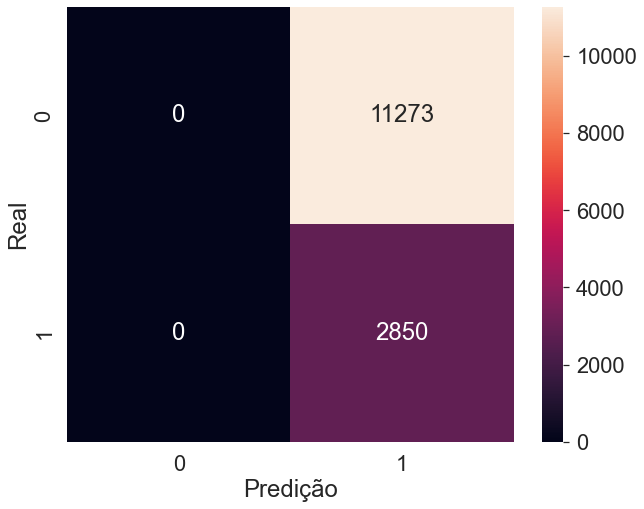

In [169]:
import numpy as np
from sklearn import preprocessing, model_selection, metrics
import pandas as pd


array_pd= []
for i in (target):
    array_pd.append(1)
target_pred_nml = pd.Series(array_pd) 
matriz = metrics.confusion_matrix(target, target_pred_nml)
plt.figure(figsize =(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz, annot = True, fmt = "d").set(xlabel = "Predição", ylabel="Real")

# Pycaret

Uma forma de iniciar a modelagem é definir os valores das metricas mínimas onde se deseja alcançar, para isso pode ser utilizado por exemplo um 
dummer classifier (Neste caso o dummy seria sem o uso do machine learning, descrito acima). Porém na pratica acredito ser melhor iniciar um uma modelagem automatizada, por exemplo com utilização do pycaret. 
O uso de stratifiedkfold para garantir o balanceamento entre as classes.

In [170]:
import pycaret.classification as pc

**1° Experimento**

O setup do pycaret possui diversos parâmetros para configuração, no primeiro experimento está sendo considerado somente os dados,
e a variável alvo, que são obrigatórios. Divisão treino e teste de 70%, e uso de validação cruzada estratificada com 10 folds. 

In [646]:
df_vars_t8

,y,var4,var7,var20,var6,var23,var14,var58,var26,var18,var17,var15,var16,var9,var52,var29,var57,var56,var59,var10,var28,var27,var60,var11,var63,var12,var40,var34,var43,var51,var53,var19,var35,var42,var13,var21,var62,var22,var39,var45,var68,var37,var49,var36,var46,var61,var47,var25,var30,var65,var66,var48,var64,var44
0,1,29442,35,26,2435,3,26,0.037822,7,4,11,13,11,3,42,4,0.833333,0.137,0.058070,63,24,0,0.311441,6498,0.632694,1166,9,44,6,0,1,1547,463,25,2007,2068,0.056146,1,4,4,0.139706,2,0,27,3,0.142303,1,4,2,0.253356,0.00603,0,0.024054,1
1,0,13684,-999,16,-999,1,16,0.069325,6,3,3,1,3,3,20,2,0.305376,0.308,0.248909,63,4,1,-999.000000,13989,0.773966,497,7,1,3,0,1,1797,532,30,2289,2417,0.070991,5,4,0,0.106618,1,0,2,0,-999.000000,0,1,1,-999.000000,-999.00000,0,0.019315,0
2,0,10232,16,10,791,3,10,0.018639,7,4,10,34,34,3,12,4,0.451613,0.213,0.214520,63,3,0,-999.000000,9739,0.980827,562,3,3,5,0,1,511,81,23,641,664,0.051046,5,4,0,0.242647,3,0,26,0,0.200814,0,1,1,-999.000000,-999.00000,0,0.018536,1
3,0,2689,13,8,1042,0,8,0.204753,1,5,23,59,60,1,36,1,0.101075,0.716,0.349421,14,19,1,-999.000000,2890,0.951564,6541,10,11,10,0,1,624,414,22,811,839,0.044301,0,4,1,0.132353,0,1,27,1,0.352379,0,0,2,0.363370,0.00201,1,0.023684,1
4,1,29428,16,10,304,3,10,0.140394,8,5,20,55,56,3,19,4,0.101075,0.596,0.189641,63,3,1,0.021226,13541,0.906155,7238,5,3,5,0,1,1413,567,26,260,270,0.059125,2,4,0,0.132353,3,1,8,0,0.226161,0,1,1,-999.000000,-999.00000,0,0.020733,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,0,28766,31,23,2094,4,23,0.063199,7,5,20,55,56,3,25,5,0.978495,0.048,0.122448,-999,26,0,-999.000000,5082,0.869828,-999,2,12,5,0,2,198,314,23,1678,1739,0.036178,5,4,0,0.147059,1,0,0,0,0.069347,0,1,1,-999.000000,-999.00000,0,0.016160,1
14119,0,-999,-999,13,-999,1,13,-999.000000,-999,-999,-999,-999,-999,-999,-999,4,-999.000000,-999.000,-999.000000,-999,24,0,-999.000000,-999,0.921292,-999,10,25,13,0,0,719,532,26,1387,1445,0.055899,5,4,0,0.198529,1,0,27,0,0.295418,0,2,1,-999.000000,-999.00000,0,0.018293,1
14120,0,23761,35,26,623,3,26,0.034263,7,4,10,34,34,3,16,4,1.000000,0.029,0.207001,14,24,0,-999.000000,1249,0.930373,882,1,44,4,0,2,482,362,25,358,380,0.040697,5,4,0,0.158088,0,0,2,0,0.203394,0,1,1,-999.000000,-999.00000,0,0.009440,1
14121,0,19593,35,26,2453,3,26,0.022503,7,5,20,55,56,1,21,4,0.833333,0.154,0.200405,63,24,0,0.070788,21128,0.680121,3849,1,24,14,1,2,1573,553,28,2033,2093,0.100384,3,4,0,0.128676,18,1,0,0,0.381038,0,0,2,-999.000000,-999.00000,0,0.041096,1


In [647]:
fold_strategy = 'stratifiedkfold',
fold = 10
with mlflow.start_run(experiment_id=experiment_id, run_name = 'Treinamento 1', nested=True, description= 'Exprerimento_1 Sem Tratamento - 5Folds'):
    data = pd.concat([df_vars_t8, target], axis=1)
    setup = pc.setup(data = df_vars_t8, 
                     target = target_col,
                     train_size=0.7,
                     silent = True,
                     fold_strategy = 'stratifiedkfold',
                     fold = fold,
                    log_experiment = True, 
                     experiment_name = experiment_name, 
                     log_plots = True
                    )
mlflow.end_run()

,Description,Value
0,session_id,7622
1,Target,y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(14123, 54)"
5,Missing Values,False
6,Numeric Features,34
7,Categorical Features,19
8,Ordinal Features,False
9,High Cardinality Features,False


**Compare Models:** O pycaret possui um metodo que compara os modelos com base no melhor resultado que é desejado. O número de modelos selecionados e a metrica definida para ordenação

In [648]:
with mlflow.start_run(experiment_id=experiment_id, run_name = 'Treinamento 1', nested=True, description= 'Exprerimento_1 Tratamento 07'):
    model1 = pc.compare_models(n_select = 1, sort='AUC')
mlflow.end_run()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8573,0.8393,0.4746,0.7379,0.5770,0.4961,0.5139,1.7450
ada,Ada Boost Classifier,0.8515,0.8314,0.4623,0.7158,0.5609,0.4765,0.4935,0.3990
lightgbm,Light Gradient Boosting Machine,0.8561,0.8285,0.4771,0.7295,0.5761,0.4941,0.5106,0.1500
rf,Random Forest Classifier,0.8415,0.8128,0.3314,0.7638,0.4605,0.3847,0.4315,0.5520
et,Extra Trees Classifier,0.8136,0.7714,0.1590,0.7029,0.2586,0.1984,0.2714,0.5360
lda,Linear Discriminant Analysis,0.8104,0.7498,0.2255,0.6045,0.3276,0.2434,0.2840,0.2390
knn,K Neighbors Classifier,0.8206,0.7323,0.4096,0.5926,0.4836,0.3795,0.3894,0.2130
lr,Logistic Regression,0.7990,0.7015,0.0852,0.5592,0.1468,0.0997,0.1574,1.1360
nb,Naive Bayes,0.4923,0.6950,0.8282,0.2653,0.4016,0.1312,0.1975,0.0320
dt,Decision Tree Classifier,0.7664,0.6550,0.4658,0.4360,0.4499,0.3020,0.3026,0.1370


**Evaluate**

In [304]:
pc.evaluate_model(model1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Tunne**: Medito permite otimizar a metrica escolhida através de um ajuste automatico de hiperparâmetros.

In [306]:
with mlflow.start_run(experiment_id=experiment_id, run_name = 'Treinamento 1', nested=True, description= 'Exprerimento_1 Tratamento 04'):
    tuned_model = pc.tune_model(model1,
                            optimize = 'Accuracy',
                            search_library = 'scikit-learn',
                            search_algorithm = 'random',
                            n_iter = 4)
mlflow.end_run()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8655,0.8683,0.5127,0.7319,0.6030,0.5250,0.5371
1,0.8787,0.8719,0.5612,0.7639,0.6471,0.5759,0.5858
2,0.8635,0.8898,0.5102,0.7194,0.5970,0.5177,0.5288
3,0.8777,0.8788,0.5408,0.7737,0.6366,0.5658,0.5790
4,0.8706,0.8751,0.5714,0.7179,0.6364,0.5589,0.5643
5,0.8746,0.8788,0.5153,0.7769,0.6196,0.5482,0.5648
6,0.8694,0.8907,0.5102,0.7519,0.6079,0.5330,0.5474
7,0.8856,0.8905,0.5867,0.7823,0.6706,0.6031,0.6122
8,0.8735,0.8775,0.5357,0.7554,0.6269,0.5533,0.5652


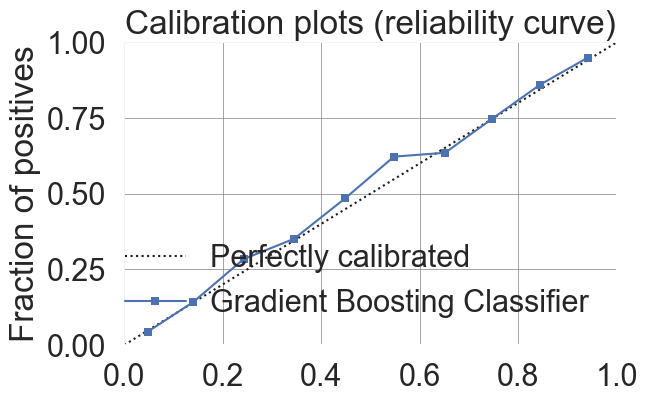

In [307]:
with mlflow.start_run(experiment_id=experiment_id, run_name = 'Treinamento 1', nested=True, description= 'Exprerimento_1 Tratamento 04'):
    calibrated_model = pc.calibrate_model(tuned_model, method='sigmoid', calibrate_fold=5, fold=5)
    pc.plot_model(calibrated_model, plot='calibration')
mlflow.end_run()

In [308]:
with mlflow.start_run(experiment_id=experiment_id, run_name = 'Treinamento 1', nested=True, description= 'Exprerimento_1 Tratamento 04'):
    pc.optimize_threshold(calibrated_model, optimize = 'Accuracy')
mlflow.end_run()

In [309]:
with mlflow.start_run(experiment_id=experiment_id, run_name = 'Treinamento 1', nested=True, description= 'Exprerimento_1 Tratamento 04'):
    pred_holdout = pc.predict_model(calibrated_model) # holdout set (test)
mlflow.end_run()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8603,0.8697,0.4893,0.7592,0.5951,0.5154,0.5335


**2° Experimento**

Inclusão do hiperparâmetro normalize=True

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to rescale the values of numeric columns in the dataset without distorting differences in the ranges of values or losing information. There are several methods available for normalization, by default, PyCaret uses zscore. https://pycaret.gitbook.io/docs/get-started/preprocessing/scale-and-transform

In [561]:
fold_strategy = 'stratifiedkfold',
fold = 5

data = pd.concat([df_vars_t6_pos_c, target], axis=1)
with mlflow.start_run(experiment_id=experiment_id, run_name = 'Treinamento 2', nested=True, description= 'Exprerimento_2 Tratamento 08'):
    setup2 = pc.setup(data = data, 
                     target = target_col,
                     train_size=0.7,
                     silent = True,
                     fold_strategy = 'stratifiedkfold',
                     fold = fold,
                     normalize=True,
                     log_experiment = True, 
                     experiment_name = experiment_name, 
                     log_plots = True
                    )
mlflow.end_run()

,Description,Value
0,session_id,6388
1,Target,y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(14123, 54)"
5,Missing Values,False
6,Numeric Features,34
7,Categorical Features,19
8,Ordinal Features,False
9,High Cardinality Features,False


Neste segunda comparação houve um ganho na precisão que foi para em torno de 80% (resultados alteram conforme a execeução). 


In [562]:
with mlflow.start_run(experiment_id=experiment_id, run_name = 'Treinamento 2', nested=True, description= 'Experimento_2 Tratamento 02'):
    model2 = pc.compare_models(n_select = 1, sort='Accuracy')
mlflow.end_run()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8550,0.8301,0.4470,0.7217,0.5514,0.4707,0.4903,1.4160
ada,Ada Boost Classifier,0.8528,0.8268,0.4445,0.7108,0.5460,0.4638,0.4825,0.4220
lightgbm,Light Gradient Boosting Machine,0.8508,0.8228,0.4318,0.7079,0.5356,0.4530,0.4731,0.2360
rf,Random Forest Classifier,0.8419,0.8012,0.2995,0.7665,0.4298,0.3581,0.4120,0.5260
lr,Logistic Regression,0.8157,0.7516,0.1794,0.6369,0.2798,0.2105,0.2668,0.3320
et,Extra Trees Classifier,0.8136,0.7644,0.1323,0.6644,0.2203,0.1653,0.2364,0.4720
lda,Linear Discriminant Analysis,0.8128,0.7406,0.1820,0.6037,0.2794,0.2059,0.2555,0.1920
ridge,Ridge Classifier,0.8076,0.0000,0.0694,0.6734,0.1258,0.0921,0.1718,0.0460
dummy,Dummy Classifier,0.8004,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0360
svm,SVM - Linear Kernel,0.7960,0.0000,0.2312,0.4974,0.2988,0.2023,0.2289,0.1380


In [288]:
pc.evaluate_model(model2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [289]:
with mlflow.start_run(experiment_id=experiment_id, run_name = 'Treinamento 2', nested=True, description= 'Exprerimento_2 Tratamento 04'):
    tuned_model = pc.tune_model(model2,
                            optimize = 'Accuracy',
                            search_library = 'scikit-learn',
                            search_algorithm = 'random',
                            n_iter = 4)
mlflow.end_run()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8635,0.8582,0.5228,0.7153,0.6041,0.5240,0.5334
1,0.8807,0.8842,0.5990,0.7516,0.6667,0.5951,0.6008
2,0.8665,0.8805,0.5482,0.7152,0.6207,0.5414,0.5485
3,0.8807,0.8952,0.5787,0.7651,0.6590,0.5883,0.5968
4,0.8635,0.8796,0.5533,0.6987,0.6176,0.5358,0.5413
5,0.8696,0.8883,0.5584,0.7237,0.6304,0.5528,0.5596
6,0.8684,0.8602,0.5431,0.7279,0.6221,0.5445,0.5530
7,0.8978,0.9117,0.6599,0.7927,0.7202,0.6583,0.6625
8,0.8806,0.8823,0.5736,0.7687,0.6570,0.5865,0.5957


Pela matrix de confusão dos casos preditos para 'entrar em contato', 455 VP (Vendedor na cara do gol sem goleiro!) e se deixa de entrar em contado com pouco menos da metade de clientes em potencial. 74% de acetividade.

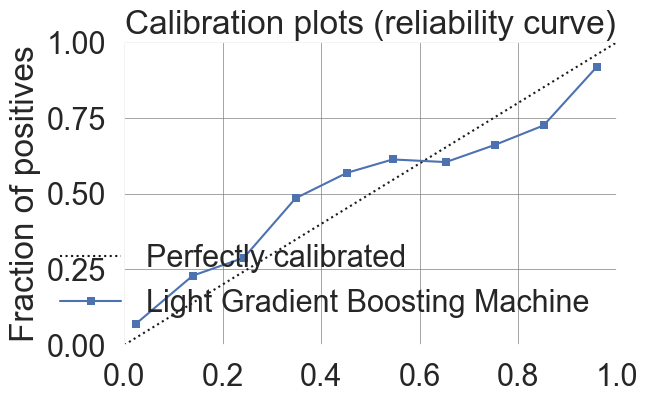

In [290]:
with mlflow.start_run(experiment_id=experiment_id, run_name = 'Treinamento 2', nested=True):
    calibrated_model = pc.calibrate_model(tuned_model, method='sigmoid', calibrate_fold=5, fold=5)
    pc.plot_model(calibrated_model, plot='calibration')
mlflow.end_run()

In [291]:
pc.optimize_threshold(calibrated_model, optimize = 'Accuracy')

CalibratedClassifierCV(base_estimator=LGBMClassifier(bagging_fraction=0.9,
                                                     bagging_freq=1,
                                                     boosting_type='gbdt',
                                                     class_weight=None,
                                                     colsample_bytree=1.0,
                                                     feature_fraction=0.9,
                                                     importance_type='split',
                                                     learning_rate=0.15,
                                                     max_depth=-1,
                                                     min_child_samples=56,
                                                     min_child_weight=0.001,
                                                     min_split_gain=0.9,
                                                     n_estimators=280,
                                             

In [293]:
with mlflow.start_run(experiment_id=experiment_id, run_name = 'Treinamento 2', nested=True):
    pred_holdout = pc.predict_model(calibrated_model) # holdout set (test)
mlflow.end_run()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8643,0.8832,0.5159,0.7529,0.6123,0.5335,0.5475


**3° Experimento**

Para o experimento 3 está sendo incluído o númeric features, categorical features baseado no dataset metadata. Porém está observado
que algumas variáveis descritas como quanlitativas nominais, se assemelham muito a quantitativas, não sendo possível inserir elas como
categorical features no pycaret

In [613]:
df_vars_t6_menor_dez_dis.keys().tolist()

['var29', 'var39', 'var41', 'var47', 'var48']

In [619]:
fold_strategy = 'stratifiedkfold',
fold = 10


with mlflow.start_run(experiment_id=experiment_id, run_name = 'Treinamento 3', nested=True):
    data = pd.concat([df_vars_t6_pos_c, target], axis=1)
    setup3 = pc.setup(data = data, 
                     target = target_col,
                     train_size=0.7,
                     silent = True,
                     fold_strategy = 'stratifiedkfold',
                     fold = fold,
                     normalize=True,
                     transformation = True,
                     ignore_low_variance = True,
                     remove_multicollinearity = True,
                     multicollinearity_threshold = 0.95,
                     #bin_numeric_features = ['var48'], # Binarizacao de variaveis none
                     group_features = None, # Grupos de variáveis para combinar na engenharia de variaveis
                     numeric_features=df_vars_t6_pos_3.keys().tolist(),
                     categorical_features = df_vars_t6_dis.keys().tolist(),
                    # ignore_features = ['target_label'],
                     feature_selection= True,
                     log_experiment = True, 
                     experiment_name = experiment_name, 
                     log_plots = True
                    )
mlflow.end_run()

,Description,Value
0,session_id,4977
1,Target,y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(14123, 44)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [620]:
with mlflow.start_run(experiment_id=experiment_id, run_name = 'Treinamento 3', nested=True):
    model3 = pc.compare_models(n_select = 1, sort='Accuracy')
mlflow.end_run()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8574,0.8427,0.4561,0.7428,0.5638,0.4845,0.5058,1.4700
ada,Ada Boost Classifier,0.8557,0.8379,0.4606,0.7288,0.5635,0.4824,0.5011,0.3930
lightgbm,Light Gradient Boosting Machine,0.8541,0.8318,0.4531,0.7268,0.5567,0.4752,0.4950,0.1490
rf,Random Forest Classifier,0.8498,0.8175,0.3862,0.7535,0.5094,0.4316,0.4659,0.5750
et,Extra Trees Classifier,0.8219,0.7905,0.1692,0.7889,0.2769,0.2212,0.3086,0.4560
lda,Linear Discriminant Analysis,0.8196,0.7629,0.2320,0.6561,0.3418,0.2643,0.3129,0.0690
lr,Logistic Regression,0.8187,0.7680,0.2251,0.6555,0.3336,0.2571,0.3071,0.5530
ridge,Ridge Classifier,0.8105,0.0000,0.1108,0.7114,0.1913,0.1447,0.2278,0.0220
svm,SVM - Linear Kernel,0.8038,0.0000,0.1917,0.5714,0.2589,0.1872,0.2293,0.0820
dummy,Dummy Classifier,0.7973,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0190


In [376]:
with mlflow.start_run(experiment_id=experiment_id, run_name = 'Treinamento', nested=True):
    tuned_model = pc.tune_model(model3,
                            optimize = 'Accuracy',
                            n_iter = 20)
mlflow.end_run()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8554,0.8675,0.5147,0.7047,0.5949,0.5095,0.5188
1,0.8625,0.8818,0.4657,0.7787,0.5828,0.5067,0.5307
2,0.8726,0.8951,0.5147,0.7955,0.6250,0.5525,0.5715
3,0.8827,0.8862,0.5588,0.8143,0.6628,0.5948,0.6102
4,0.8706,0.8621,0.5098,0.7879,0.6190,0.5454,0.5641
5,0.8493,0.8526,0.4657,0.7037,0.5605,0.4741,0.4888
6,0.8583,0.8750,0.4877,0.7333,0.5858,0.5045,0.5197
7,0.8735,0.8836,0.5320,0.7826,0.6334,0.5603,0.5756
8,0.8543,0.8425,0.4877,0.7122,0.5789,0.4945,0.5075


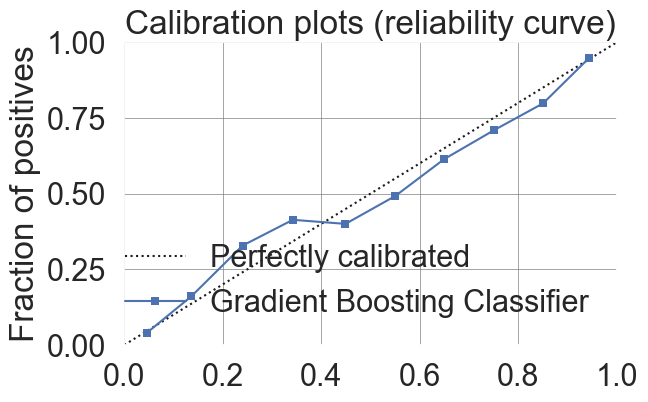

In [226]:
with mlflow.start_run(experiment_id=experiment_id, run_name = 'Treinamento', nested=True):
    calibrated_model = pc.calibrate_model(tuned_model, method='sigmoid', calibrate_fold=5, fold=5)
    pc.plot_model(calibrated_model, plot='calibration')
mlflow.end_run()

In [ ]:
pc.optimize_threshold(calibrated_model, optimize = 'Precision')

In [251]:
data.keys()

Index(['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9',
       'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'var16', 'var17',
       'var18', 'var19', 'var20', 'var21', 'var22', 'var23', 'var24', 'var25',
       'var26', 'var27', 'var28', 'var29', 'var30', 'var31', 'var32', 'var33',
       'var34', 'var35', 'var36', 'var37', 'var38', 'var39', 'var40', 'var41',
       'var42', 'var43', 'var44', 'var45', 'var46', 'var47', 'var48', 'var49',
       'var50', 'var51', 'var53', 'var54', 'var55', 'var56', 'var59', 'var60',
       'var61', 'var62', 'var63', 'var64', 'var65', 'var67', 'var68', 'y'],
      dtype='object')

**4° Experimento**

In [621]:
fold_strategy = 'stratifiedkfold',
fold = 10


with mlflow.start_run(experiment_id=experiment_id, run_name = 'Treinamento 4', nested=True):
    data = pd.concat([df_vars_t6_pos_c, target], axis=1)
    setup4 = pc.setup(data = data, 
                     target = target_col,
                     train_size=0.7,
                     silent = True,
                     fold_strategy = 'stratifiedkfold',
                     fold = fold,
                     normalize=True,
                     transformation = True,
                     ignore_low_variance = True,
                      remove_multicollinearity = True,
                      multicollinearity_threshold = 0.95,
                     #bin_numeric_features = None, # Binarizacao de variaveis
                     #group_features = None, # Grupos de variáveis para combinar na engenharia de variaveis
                    #ignore_features = ignore_vars,
                     feature_selection= True,
                    #categorical_features = categoricas,
                     log_experiment = True, 
                     experiment_name = experiment_name, 
                     log_plots = True
                    )
mlflow.end_run()

,Description,Value
0,session_id,1089
1,Target,y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(14123, 44)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [632]:
with mlflow.start_run(experiment_id=experiment_id, run_name = 'Treinamento 4', nested=True):
    model4 = pc.compare_models(n_select = 1, sort='AUC')
mlflow.end_run()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8636,0.8464,0.4753,0.7541,0.5823,0.5059,0.5255,1.7410
ada,Ada Boost Classifier,0.8616,0.8391,0.4687,0.7475,0.5753,0.4979,0.5177,0.3600
lightgbm,Light Gradient Boosting Machine,0.8623,0.8352,0.4707,0.7504,0.5776,0.5005,0.5205,0.1680
rf,Random Forest Classifier,0.8554,0.8137,0.3929,0.7746,0.5205,0.4460,0.4821,0.5490
et,Extra Trees Classifier,0.8223,0.7877,0.1606,0.7763,0.2656,0.2112,0.2983,0.4300
lr,Logistic Regression,0.8194,0.7666,0.2187,0.6459,0.3258,0.2502,0.2997,0.9250
lda,Linear Discriminant Analysis,0.8202,0.7613,0.2278,0.6468,0.3356,0.2586,0.3064,0.1060
nb,Naive Bayes,0.2522,0.6663,0.9682,0.2080,0.3421,0.0184,0.0616,0.0260
dt,Decision Tree Classifier,0.7678,0.6572,0.4727,0.4282,0.4491,0.3025,0.3033,0.0960
knn,K Neighbors Classifier,0.7878,0.6458,0.1616,0.4231,0.2331,0.1379,0.1598,0.7430


# Modelo Sem Pycaret

Na modelagem sem o pycaret os resultados são um pouco inferiores, mas com pouco diferença, podendo sim haver ajustes de hiperparâmetros com algoritmos GridsearchCV entre outros.

**Regressão Logistica**

In [479]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
import sklearn.linear_model as lm
from sklearn.model_selection import StratifiedKFold
model_map = {
    'default': lm.LogisticRegression(),
    'log_l1': lm.LogisticRegression(penalty='l1', solver='liblinear', C=1.0),
    'log_l2': lm.LogisticRegression(penalty='l2', solver='liblinear', C=1.0),
    'log_el': lm.LogisticRegression(penalty='elasticnet',l1_ratio= 0.4, solver='saga', C=1.0),
}
X=df_vars_t7
Y=target
cv = StratifiedKFold(n_splits = 5, shuffle = False)
print("{}\t{}\t{}\t{}\t{}".format("Modelo","Acuracy","Preci","Recall", "F1-Score"))
print("-----------------------------------------")
for modelname, model in model_map.items():
    accuracy = cross_val_score (model, X, Y, cv=cv, scoring='accuracy')
    precision = cross_val_score (model, X, Y, cv=cv, scoring='precision_macro')
    recall = cross_val_score (model, X, Y, cv=cv, scoring='recall_macro')
    scoref1 = cross_val_score (model, X, Y, cv=cv, scoring='f1_macro')
    print("{}\t{: .2f}\t{: .2f}\t{: .2f}\t{: .2f}%"
          .format(modelname, accuracy.mean()*100, precision.mean()*100, recall.mean()*100, scoref1.mean()*100))
    

Modelo	Acuracy	Preci	Recall	F1-Score
-----------------------------------------
default	 79.07	 60.15	 52.09	 49.83%
log_l1	 83.81	 79.48	 66.36	 68.14%
log_l2	 83.49	 78.32	 65.44	 67.45%
log_el	 79.07	 59.94	 51.88	 49.44%


**Arvore de Decisão**

Arvores de decisão com seleção de featres, resultados bem próximos dos do Pycaret para profundidade 3, 4 e 5.

In [638]:
from sklearn import tree
from sklearn.metrics import accuracy_score

with mlflow.start_run(experiment_id=experiment_id, run_name = 'DecisionTree', nested=True, description= 'Exprerimento_5 Tratamento 08'):

    X = df_vars_t8.drop(columns='y')
    Y = target 

    cv = StratifiedKFold(n_splits = 5, shuffle = False)

    print("{}\t\t\t{}\t{}\t{}\t{}".format("Modelo","Acuracy","Prec","Recall", "F1-Score"))
    print("------------------------------------------------------------------")
    for i in range(1, 10):
        model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = i)
        modelname='Tree max_depth {}'.format(i)
        accuracy = cross_val_score (model, X, Y, cv=cv, scoring='accuracy')
        precision = cross_val_score (model, X, Y, cv=cv, scoring='precision_macro')
        recall = cross_val_score (model, X, Y, cv=cv, scoring='recall_macro')
        scoref1 = cross_val_score (model, X, Y, cv=cv, scoring='f1_macro')
        #auc=cross_val_score (model, X, Y, cv=cv, scoring='auc')
        print("{}\t{: .2f}\t{: .2f}\t{: .2f}\t{: .2f}%"
              .format(modelname, accuracy.mean()*100, precision.mean()*100, recall.mean()*100, scoref1.mean()*100))
        mlflow.log_metric('Accuracy', accuracy.mean())
        mlflow.log_metric('Prec.', precision.mean())
        mlflow.log_metric('Recall', recall.mean())
        mlflow.log_metric('F1', scoref1.mean())
        #mlflow.log_metric('auc', auc)
mlflow.end_run()

Modelo			Acuracy	Prec	Recall	F1-Score
------------------------------------------------------------------
Tree max_depth 1	 83.72	 75.09	 70.47	 72.27%
Tree max_depth 2	 85.46	 79.78	 70.56	 73.57%
Tree max_depth 3	 85.46	 79.78	 70.56	 73.57%
Tree max_depth 4	 85.44	 80.50	 69.56	 72.81%
Tree max_depth 5	 85.19	 79.23	 70.52	 73.31%
Tree max_depth 6	 85.04	 78.79	 70.98	 73.55%
Tree max_depth 7	 84.60	 77.84	 70.39	 72.90%
Tree max_depth 8	 84.21	 77.01	 70.64	 72.76%
Tree max_depth 9	 82.95	 75.03	 69.76	 71.39%


In [652]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

with mlflow.start_run(experiment_id=experiment_id, run_name = 'RandomForestClassifier', nested=True, description= 'Exprerimento_5 Tratamento 08'):

    X = df_vars_t7.drop(columns='y')
    Y = target 

    cv = StratifiedKFold(n_splits = 10, shuffle = False)

    print("{}\t\t\t{}\t{}\t{}\t{}".format("Modelo","Acuracy","Prec","Recall", "F1-Score"))
    print("------------------------------------------------------------------")

    model = RandomForestClassifier()
    accuracy = cross_val_score (model, X, Y, cv=cv, scoring='accuracy')
    precision = cross_val_score (model, X, Y, cv=cv, scoring='precision_macro')
    recall = cross_val_score (model, X, Y, cv=cv, scoring='recall_macro')
    scoref1 = cross_val_score (model, X, Y, cv=cv, scoring='f1_macro')
        #auc=cross_val_score (model, X, Y, cv=cv, scoring='auc')
    print("{}\t{: .2f}\t{: .2f}\t{: .2f}\t{: .2f}%"
            .format(modelname, accuracy.mean()*100, precision.mean()*100, recall.mean()*100, scoref1.mean()*100))
    mlflow.log_metric('Accuracy', accuracy.mean())
    mlflow.log_metric('Prec.', precision.mean())
    mlflow.log_metric('Recall', recall.mean())
    mlflow.log_metric('F1', scoref1.mean())
        #mlflow.log_metric('auc', auc)
mlflow.end_run()

Modelo			Acuracy	Prec	Recall	F1-Score
------------------------------------------------------------------
Tree max_depth 9	 85.07	 80.44	 68.32	 71.50%


In [656]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

with mlflow.start_run(experiment_id=experiment_id, run_name = 'RandomForestClassifier', nested=True, description= 'Exprerimento_5 Tratamento 08'):

    X = df_vars_t6_pos_c
    Y = target 

    cv = StratifiedKFold(n_splits = 10, shuffle = False)

    print("{}\t\t\t{}\t{}\t{}\t{}".format("Modelo","Acuracy","Prec","Recall", "F1-Score"))
    print("------------------------------------------------------------------")

    model = GradientBoostingClassifier()
    accuracy = cross_val_score (model, X, Y, cv=cv, scoring='accuracy')
    precision = cross_val_score (model, X, Y, cv=cv, scoring='precision_macro')
    recall = cross_val_score (model, X, Y, cv=cv, scoring='recall_macro')
    scoref1 = cross_val_score (model, X, Y, cv=cv, scoring='f1_macro')
        #auc=cross_val_score (model, X, Y, cv=cv, scoring='auc')
    print("{}\t{: .2f}\t{: .2f}\t{: .2f}\t{: .2f}%"
            .format(modelname, accuracy.mean()*100, precision.mean()*100, recall.mean()*100, scoref1.mean()*100))
    mlflow.log_metric('Accuracy', accuracy.mean())
    mlflow.log_metric('Prec.', precision.mean())
    mlflow.log_metric('Recall', recall.mean())
    mlflow.log_metric('F1', scoref1.mean())
        #mlflow.log_metric('auc', auc)
mlflow.end_run()

Modelo			Acuracy	Prec	Recall	F1-Score
------------------------------------------------------------------
Tree max_depth 9	 86.13	 81.39	 71.61	 74.75%


# Resultados

Durante o processo de analise exploratória foram verificados diversos tipos de tratamento de dados, como normalização, transformação.
Separação dos dados conforme seus intervalos de valores e visualização e agrupamento, posteriormente normalização para depois aplicar a modelagem.
No pycaret foram feitos 4 experimentos com parâmetros diferentes para aplicação dos dados vindos dos tratamentos. Mas não houve grande alteração dos resultados finais. No MLflow é possível rerregar os experimentos e verificar os melhores resultados. Neste caso o melhor foi Gradient Boosting Classifier com	0.8769 de acurácia

In [630]:
experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment is None:
    experiment_id = mlflow.create_experiment(experiment_name)
    experiment = mlflow.get_experiment(experiment_id)
experiment_id = experiment.experiment_id
df_ml = mlflow.search_runs([experiment_id], order_by=["metrics.Accuracy DESC"])
df_ml[['start_time','tags.mlflow.runName', 'metrics.Accuracy']].head()


,start_time,tags.mlflow.runName,metrics.Accuracy
0,2022-06-03 19:48:57.878000+00:00,Gradient Boosting Classifier,0.8769
1,2022-06-04 14:30:06.207000+00:00,Gradient Boosting Classifier,0.8762
2,2022-06-04 22:35:26.835000+00:00,Gradient Boosting Classifier,0.8757
3,2022-06-03 22:51:21.914000+00:00,Light Gradient Boosting Machine,0.8756
4,2022-06-03 22:52:17.629000+00:00,Light Gradient Boosting Machine,0.8752


**Matrix de Confisão**</br>
Na matriz de confisão, o algoritmo já filtra corretamente 3227 contatos que não estão precisando do produto, 77,26%. Ou seja,
deixa de incomodar esse volume de pessoas, e economiza bastante tempo dos vendedores deixando de ligar para esse volume de pessoas. E ai entra em efeito dominó positivo de, precisar de menos vendedores, escolher os melhores para a equipe de vendas, capacitar melhor os que ficarem, entre outros inumeros. Como os experimentos foram feitos com validação cruzada e 10 folds (maioria) praticamente se garante a manutenção desses resultados em operação (desque que não haja necessidade de retreino por alguma mudança brusca na informação).

Um total de 458 clientes certos, onde o algoritmo aceta a indicação, em torno de 11% do total da informação. E em torno de 8% de clientes que precisam do produto mas serial preditos como não precisam.

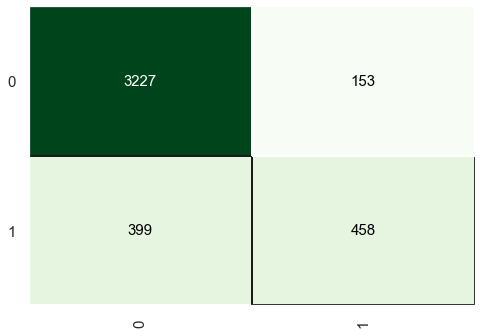

Importancia das features, com a var4 como feature mais importante, seguindo pela var8 e var7. Esse analise das features pode gerar melhorias na coleta de dados, ou um estudo de novas informações a serem coletadas com base nas que são as mais importantes na para os algoritmos de ML.

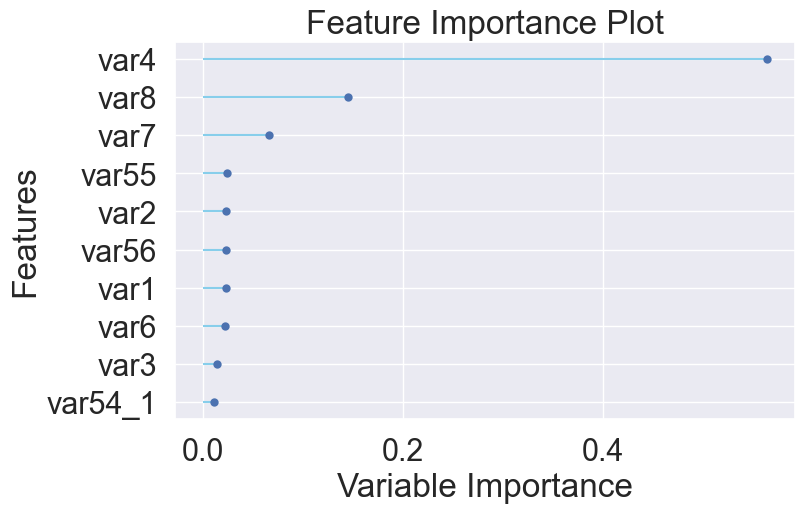

E como todo esse processo é continuo sempre pode haver melhorias nos resultados com melhorias nas etapas anteriores. Sendo um clico de analise
desenvolvimento, validação, operação e novamente analise, e assim pode diante